# Carga de Datos

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Vista de cabecera de la data a trabajar
data = pd.read_csv("datos_de_prueba.csv")
print(data.shape)
data.head()

(3000, 15)


,ID del cliente,Sexo,Edad,Ingresos,Tipo de hogar,Estado civil,Número de hijos,Puntuación de crédito,Tipo de trabajo,Educación,Fecha de inicio de la póliza,Tipo de seguro,Monto del seguro,Fecha del reclamo,Monto del reclamo
0,1,Femenino,28,558900,Departamento,Viudo,3,556,Empresario,Preparatoria,2022-03-28,Vida,1806,2022-11-14,558
1,2,Femenino,18,212925,Departamento,Viudo,1,330,Empleado,Posgrado,2022-09-15,Vida,1371,2022-04-25,922
2,3,Femenino,37,838328,Departamento,Casado,3,776,Empresario,Universidad,2022-03-18,Hogar,6751,2022-07-31,3128
3,4,Masculino,25,459616,Casa,Soltero,4,821,Independiente,Universidad,2022-11-14,Hogar,5448,2022-07-29,1493
4,5,Masculino,41,678250,Casa,Casado,4,580,Empresario,Universidad,2023-03-02,Vida,5625,2022-07-08,1907


In [3]:
# Resumen general:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID del cliente                3000 non-null   int64 
 1   Sexo                          3000 non-null   object
 2   Edad                          3000 non-null   int64 
 3   Ingresos                      3000 non-null   int64 
 4   Tipo de hogar                 3000 non-null   object
 5   Estado civil                  3000 non-null   object
 6   Número de hijos               3000 non-null   int64 
 7   Puntuación de crédito         3000 non-null   int64 
 8   Tipo de trabajo               3000 non-null   object
 9   Educación                     3000 non-null   object
 10  Fecha de inicio de la póliza  3000 non-null   object
 11  Tipo de seguro                3000 non-null   object
 12  Monto del seguro              3000 non-null   int64 
 13  Fecha del reclamo 

- Del resumen anterior se observa que no hay nulos en la data y por lo tanto 
  no será necesario un tratamiento de nulos.

In [4]:
# Cambiamos los nombres de algunas columnas da la data 
# para un mejor manejo de la metadata
data.rename(columns={"ID del cliente": "Id_Cliente", 
                     "Tipo de hogar": "Tipo_Hogar", 
                     "Estado civil": "Estado_Civil", 
                     "Número de hijos": "Numero_Hijos",
                     "Puntuación de crédito": "Score_Credito", 
                     "Tipo de trabajo": "Tipo_Trabajador", 
                     "Educación": "Educacion", 
                     "Fecha de inicio de la póliza": "Fecha_Poliza", 
                     "Tipo de seguro": "Tipo_Seguro", 
                     "Monto del seguro": "Monto_Seguro", 
                     "Fecha del reclamo": "Fecha_Reclamo", 
                     "Monto del reclamo": "Monto_Reclamo"}, inplace=True)
data.head()

,Id_Cliente,Sexo,Edad,Ingresos,Tipo_Hogar,Estado_Civil,Numero_Hijos,Score_Credito,Tipo_Trabajador,Educacion,Fecha_Poliza,Tipo_Seguro,Monto_Seguro,Fecha_Reclamo,Monto_Reclamo
0,1,Femenino,28,558900,Departamento,Viudo,3,556,Empresario,Preparatoria,2022-03-28,Vida,1806,2022-11-14,558
1,2,Femenino,18,212925,Departamento,Viudo,1,330,Empleado,Posgrado,2022-09-15,Vida,1371,2022-04-25,922
2,3,Femenino,37,838328,Departamento,Casado,3,776,Empresario,Universidad,2022-03-18,Hogar,6751,2022-07-31,3128
3,4,Masculino,25,459616,Casa,Soltero,4,821,Independiente,Universidad,2022-11-14,Hogar,5448,2022-07-29,1493
4,5,Masculino,41,678250,Casa,Casado,4,580,Empresario,Universidad,2023-03-02,Vida,5625,2022-07-08,1907


# Creación del Target

In [5]:
# Primero construimos la variable Dias_reclamo que establecera la cantidad
data["Dias_reclamo"] = (pd.to_datetime(data["Fecha_Reclamo"]) 
                        - pd.to_datetime(data["Fecha_Poliza"])
                       ).apply(lambda x: x.days)
data.Dias_reclamo.value_counts().sort_index()

-351    1
-347    1
-340    1
-335    2
-334    1
       ..
 354    1
 355    2
 356    1
 359    1
 361    1
Name: Dias_reclamo, Length: 633, dtype: int64

- Vemos que existen días transcurridos negativos desde la fecha de inicio de la póliza
  hasta la fecha del reclamo, esto indica que la fecha del reclamo se dió antes de tener
  el seguro, lo cual no es razonable a menos que el reclamo sea en base a otro tipo de póliza
  el cual no se tiene mapeado en la data proporcionada y dado que no se tiene certeza de ello, 
  se asumiran como no reclamo.

In [6]:
# Se considerará como éxito a aquellos con fecha de reclamo menor o igual
# a un año respecto a la fecha de inicio de su póliza y a aquellos
# con fecha posterior a esta.
data["Reclamo_1a"] = np.where((data["Dias_reclamo"]>0) & (data["Dias_reclamo"]<=365), 1, 0)
data.Reclamo_1a.value_counts()

1    1511
0    1489
Name: Reclamo_1a, dtype: int64

- Tenemos data balanceada!

# Análisis Exploratorio

In [7]:
# Instalamos sweetviz para hacer EDA
#!pip install sweetviz
import sweetviz as sv
from methods_classes import vars_cont_cat

In [8]:
# Establecemos las variables predictoras que podrían participar en el modelo
var_exp = ['Sexo', 'Edad', 'Ingresos', 'Tipo_Hogar', 'Estado_Civil',
           'Numero_Hijos', 'Score_Credito', 'Tipo_Trabajador', 'Educacion',
           'Tipo_Seguro', 'Monto_Seguro']

# Variable Objetivo
var_obj = ["Reclamo_1a"]

# Variables candidatas y variable objetivo del modelo
var_model = var_exp + var_obj
data_var = data[var_model]
data_var.head()

,Sexo,Edad,Ingresos,Tipo_Hogar,Estado_Civil,Numero_Hijos,Score_Credito,Tipo_Trabajador,Educacion,Tipo_Seguro,Monto_Seguro,Reclamo_1a
0,Femenino,28,558900,Departamento,Viudo,3,556,Empresario,Preparatoria,Vida,1806,1
1,Femenino,18,212925,Departamento,Viudo,1,330,Empleado,Posgrado,Vida,1371,0
2,Femenino,37,838328,Departamento,Casado,3,776,Empresario,Universidad,Hogar,6751,1
3,Masculino,25,459616,Casa,Soltero,4,821,Independiente,Universidad,Hogar,5448,0
4,Masculino,41,678250,Casa,Casado,4,580,Empresario,Universidad,Vida,5625,0


- No se incluyeron las variables: \
  \
  Id_Cliente: Debido a que es un identificador y la base es de clientes únicos. \
  \
  Fecha_Poliza: Porque la predicción se hará en la misma fecha de inicia de la póliza de cada cliente. \
  \
  Fecha_Reclamo: Porque es una fecha que establece el cliente y no la compañía. \
  \
  Dias_reclamo: Por ser resultado de Fecha_Reclamo y Fecha_Poliza. \
  \
  Monto_Reclamo: Porque es un monto que establece el cliente y no la compañía. \
  \
  Target: Porque es la variable a predecir.

C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`


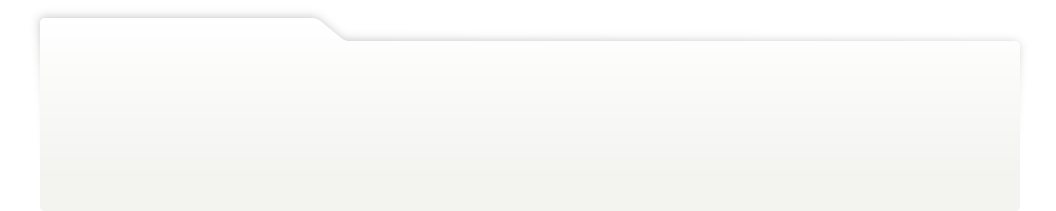
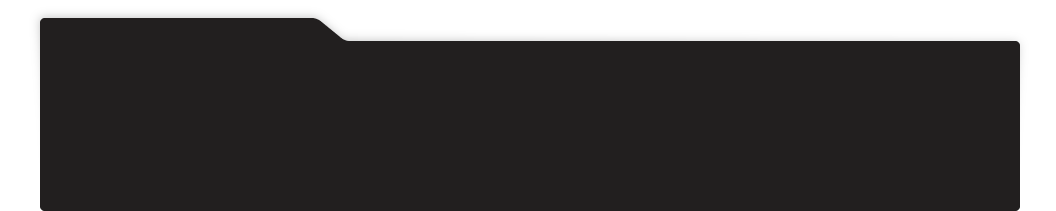
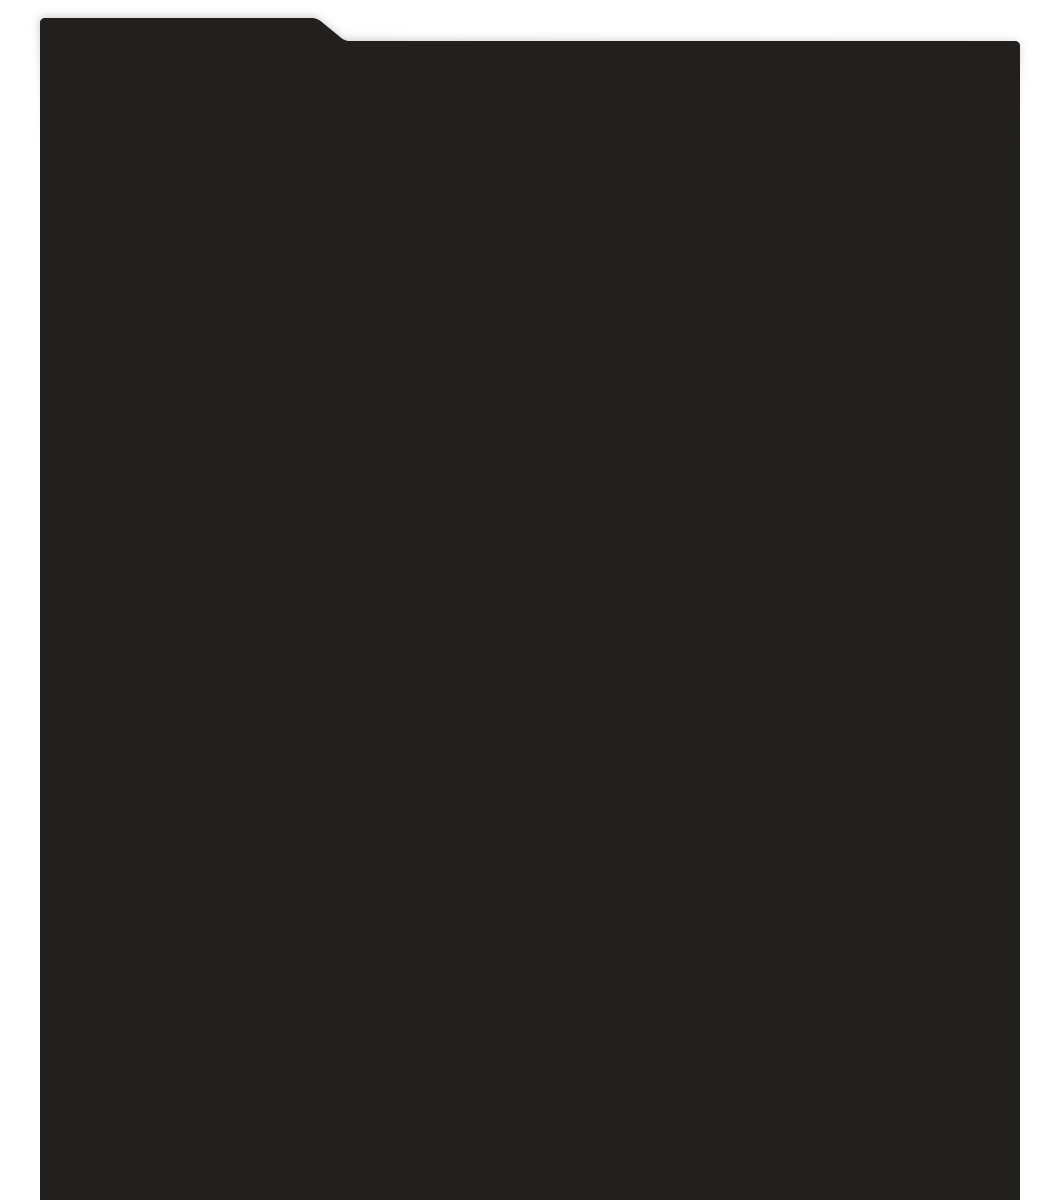
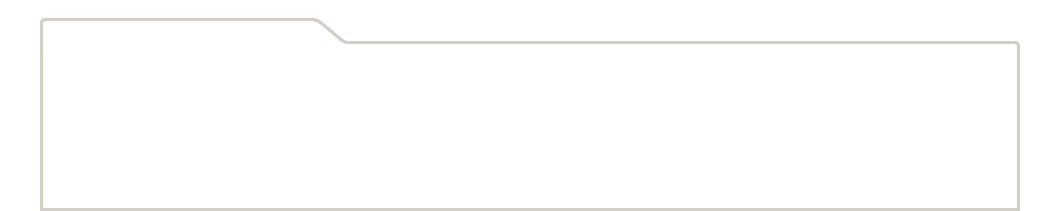
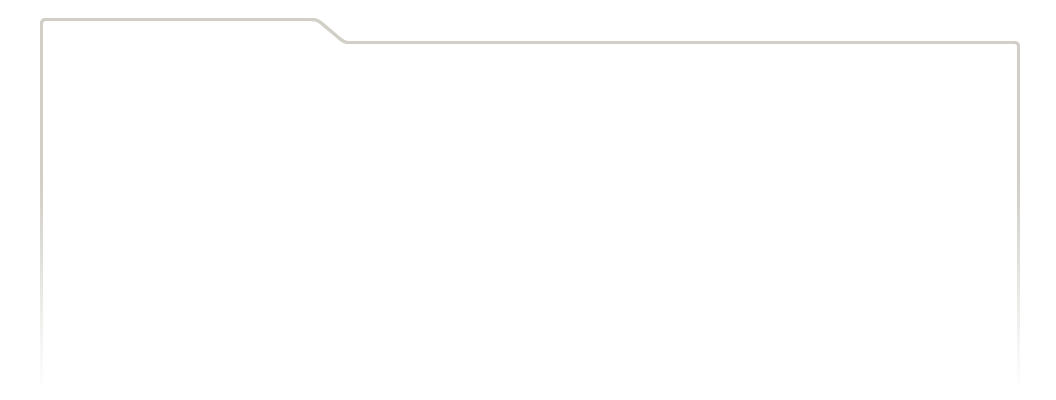
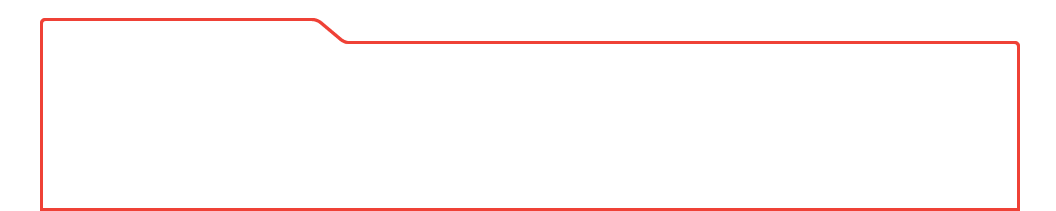
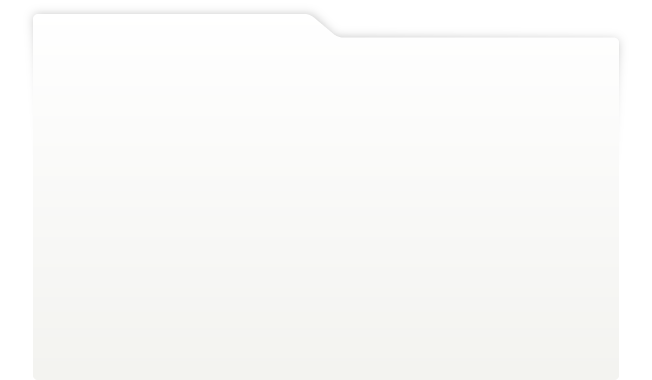
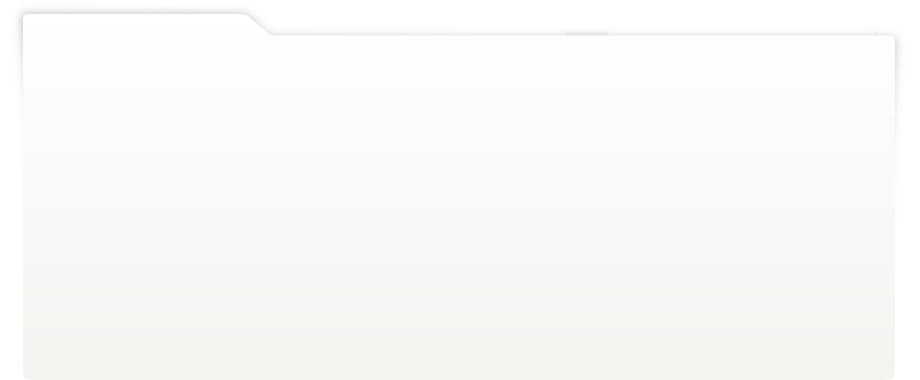
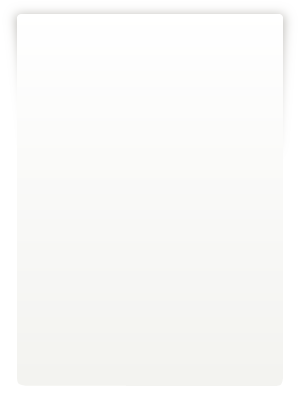
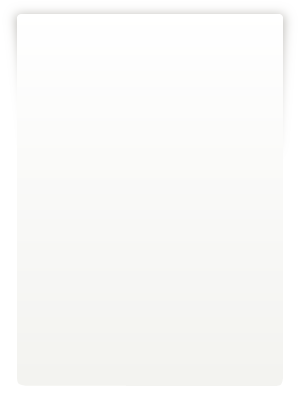
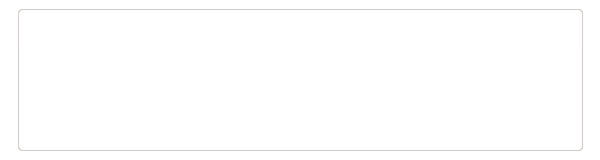
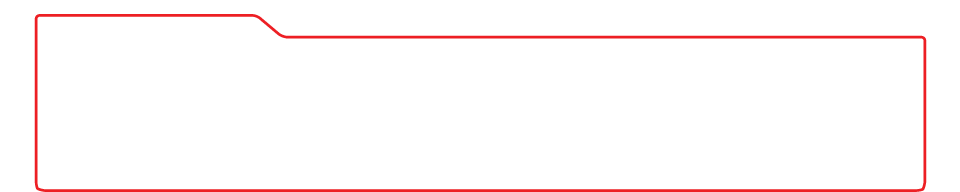
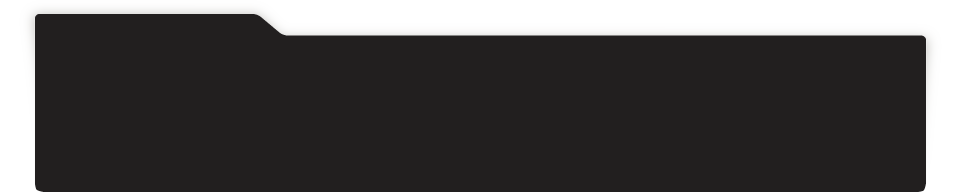
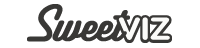
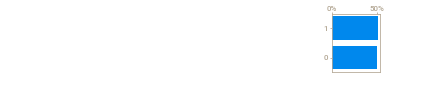
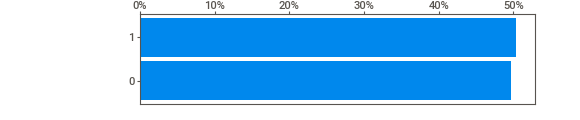
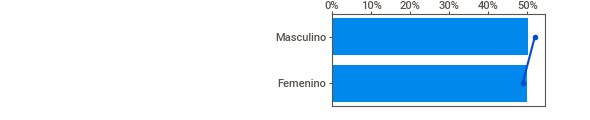
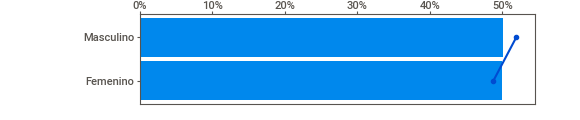
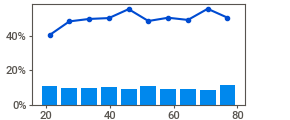
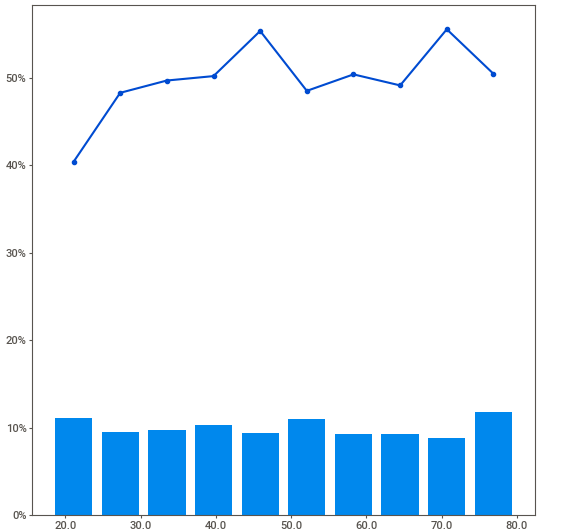
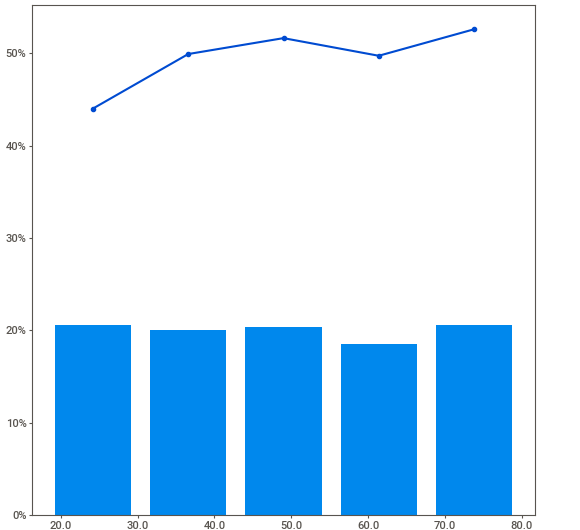
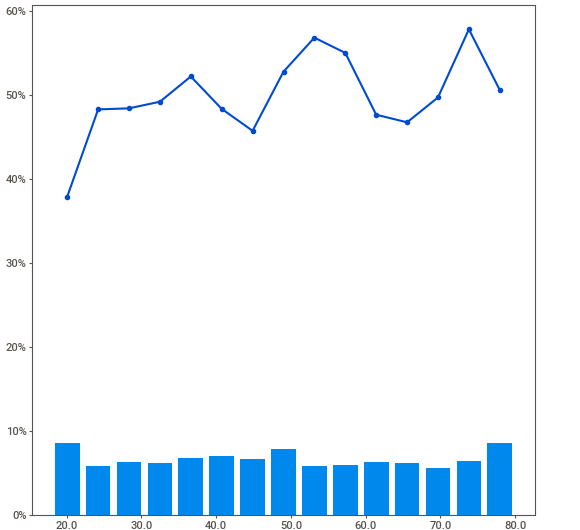
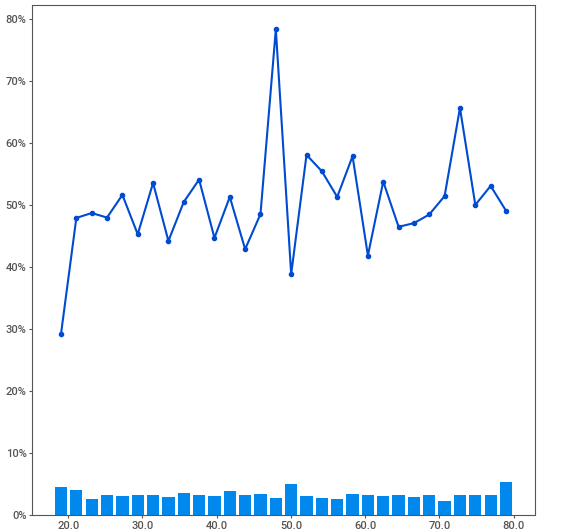
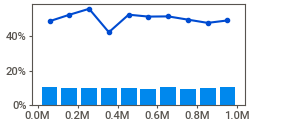
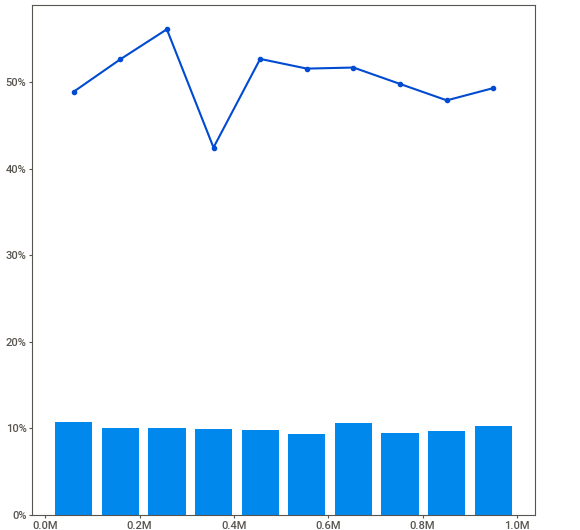
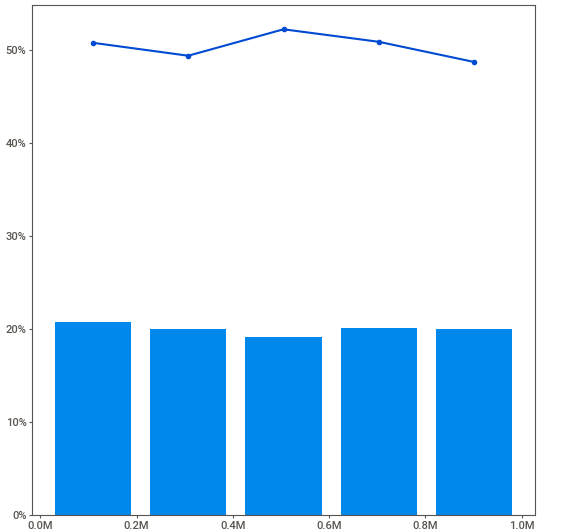
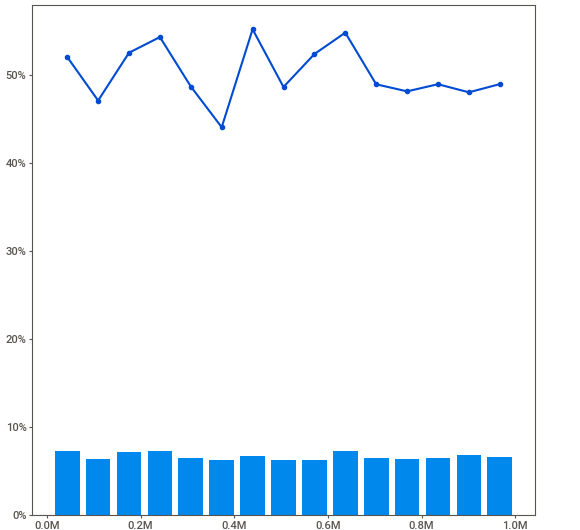
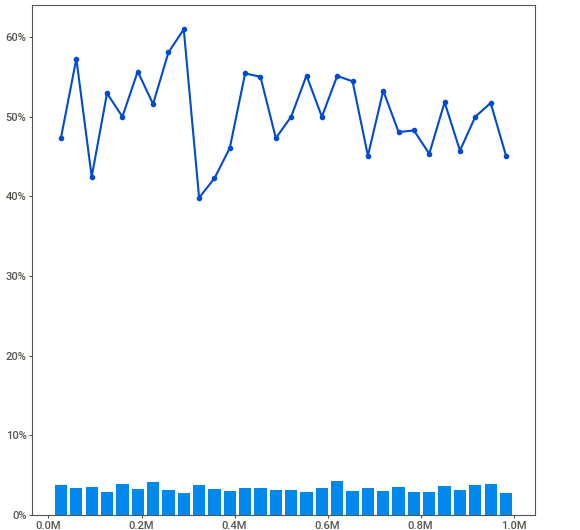
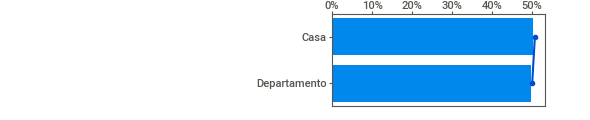
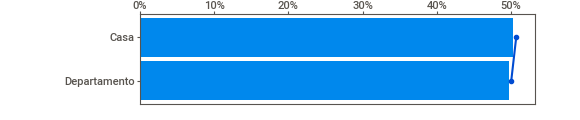
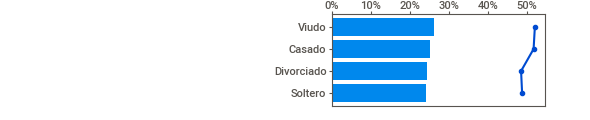
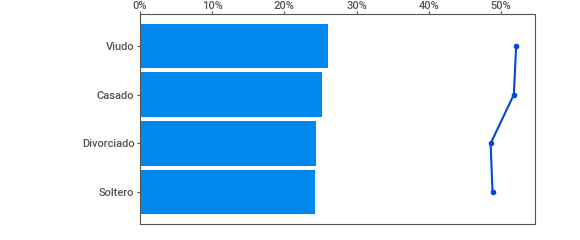
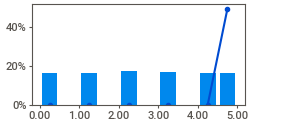
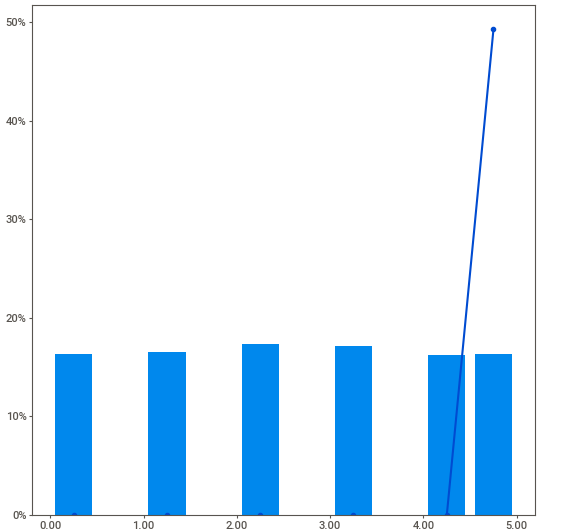
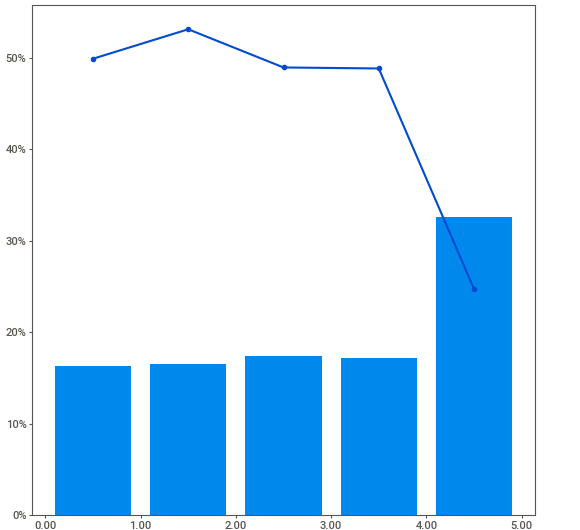
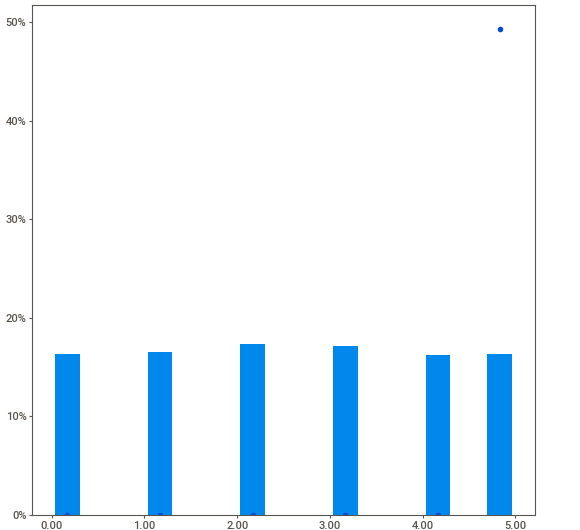
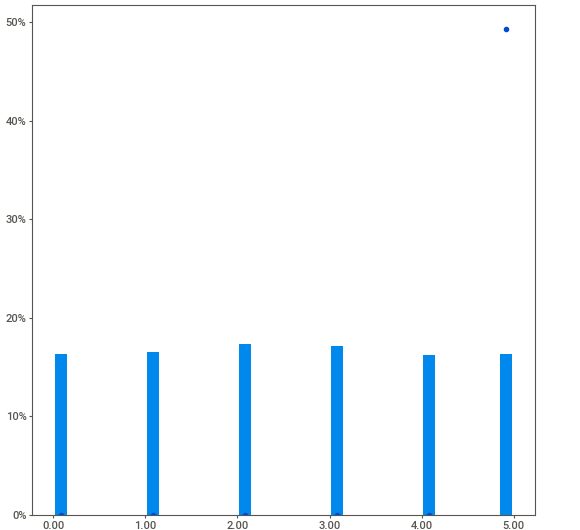
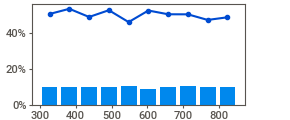
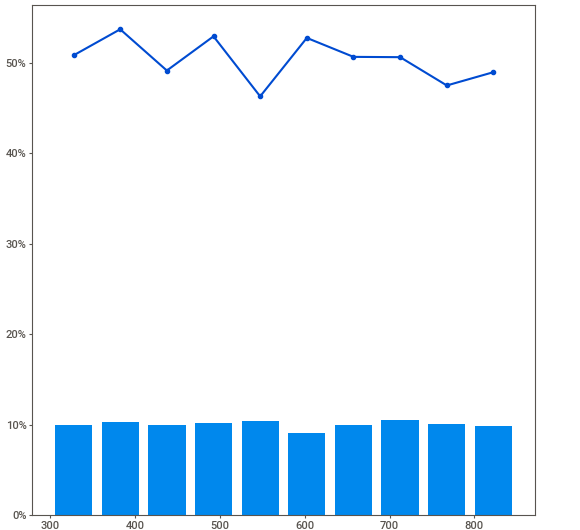
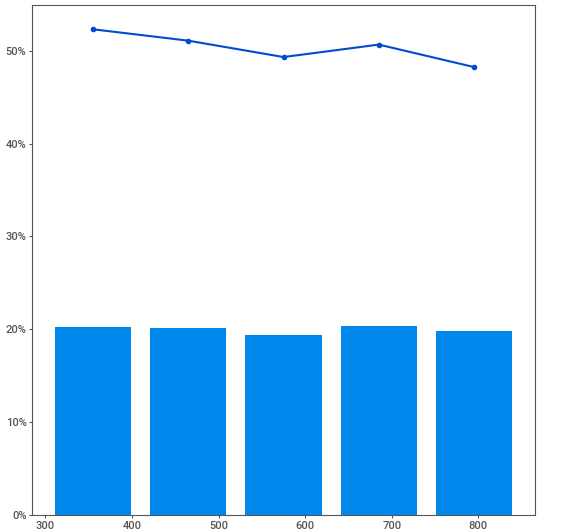
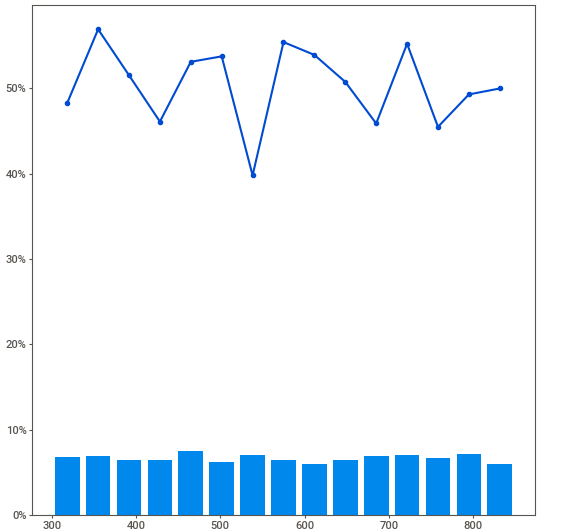
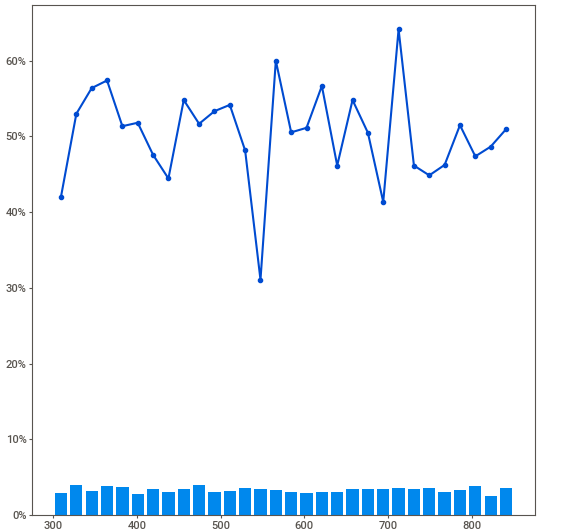
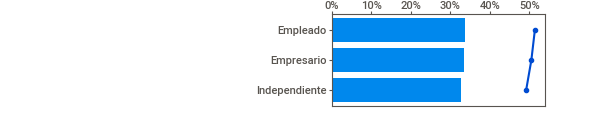
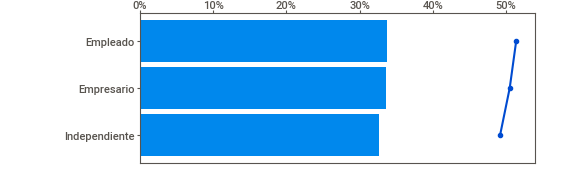
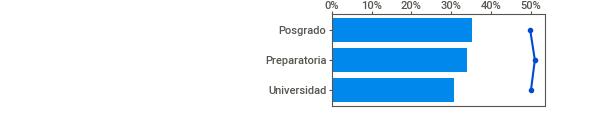
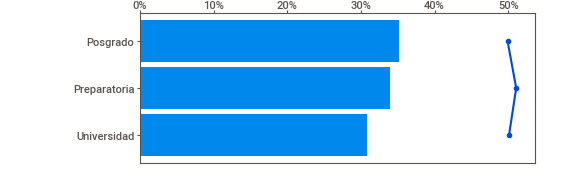
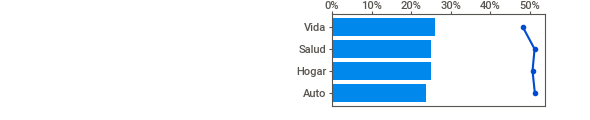
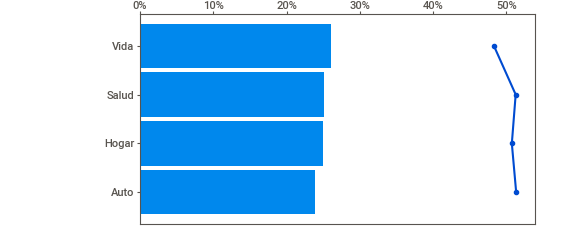
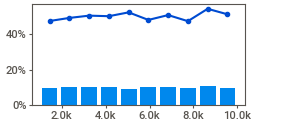
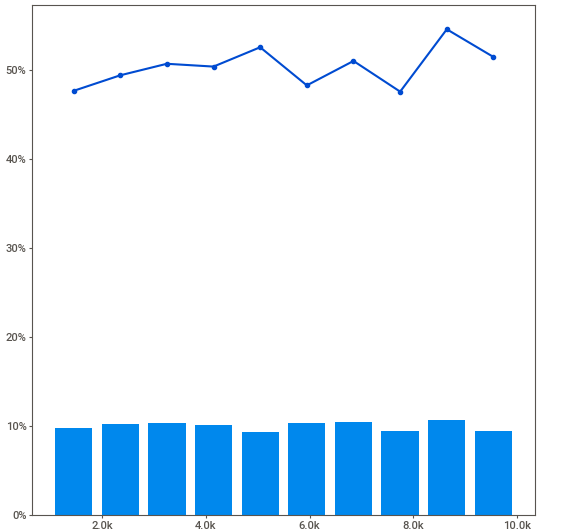
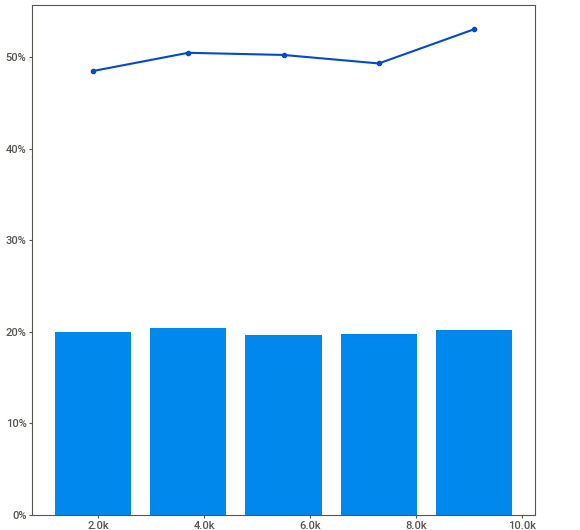
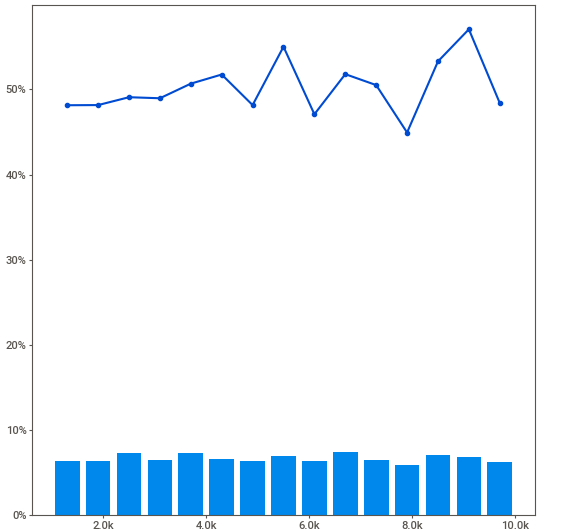
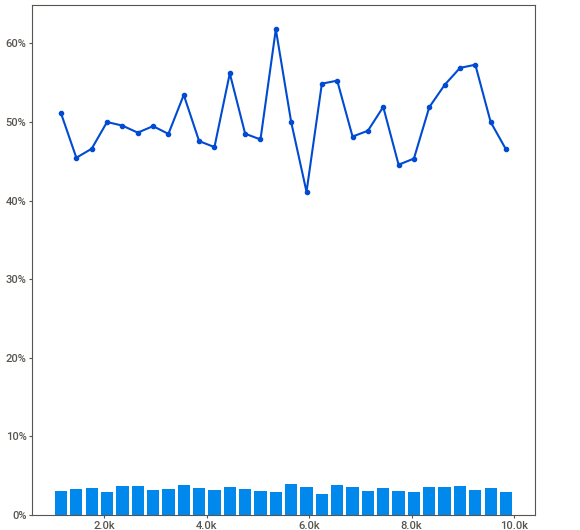
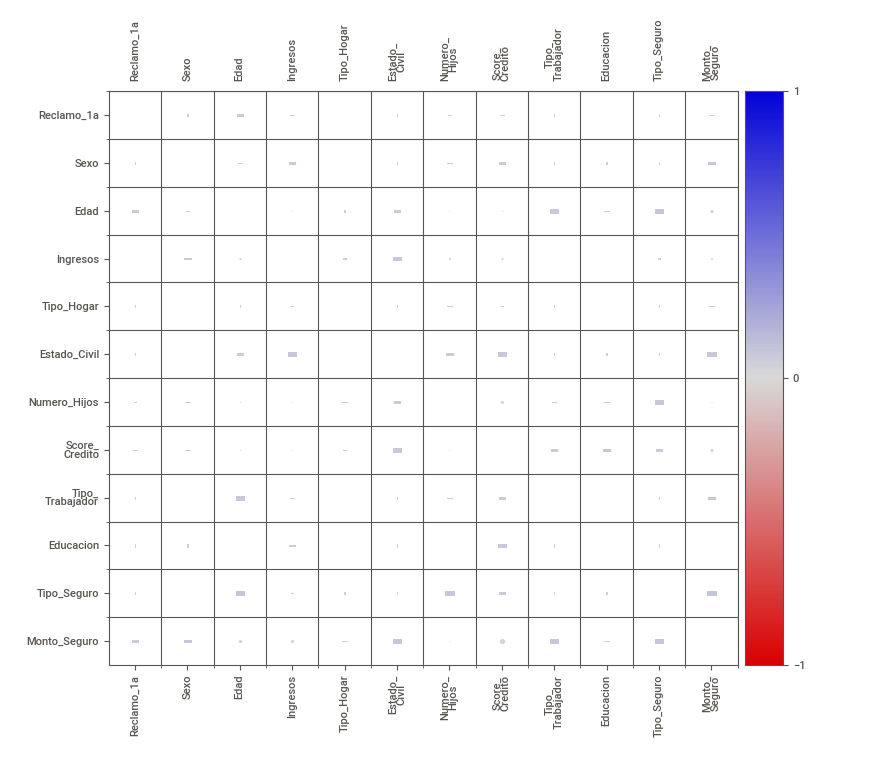
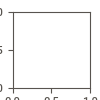

In [9]:
# Este EDA nos da un panorama general de nuestras variables con respecto al target
feature_config = sv.FeatureConfig(force_num=["Numero_Hijos"])
EDA_sv = sv.analyze(data_var, target_feat="Reclamo_1a", feat_cfg=feature_config)
EDA_sv.show_notebook()

- De Swetviz podemos ver algunas tendencias:\
  \
  Sexo vs Reclamo: Las mujeres presentan menos reclamos que los hombres, sin embargo, esta diferencia no es del todo significativa.\
  \
  Edad vs Reclamo: Mientras más longeva sea una persona, tiene mayor propensión a hacer un reclamo, esta tendencia parece ser significativa.\
  \
  Ingresos vs Reclamo: A mayores ingresos menos propensión a hacer un reclamos, sin embargo esta tendencia, gráficamente, no es del todo significativa.\
  \
  Tipo_Hogar vs Reclamo: Las personas con departamento presentan menos reclamos que las personas con casa, pero esta diferencia no es significativa.\
  \
  Estado_Civil vs Reclamo: Las personas viudas y casadas tienden a hacer más reclamos que los solteros
  o divorciados, esta diferencia parece ser significativa.\
  \
  Numero_Hijos vs Reclamo: Las personas con más hijos pressentan menor propensión a realizar un reclamo, esta diferencia se hace significativa a partir de los 5 hijos.\
  \
  Score_Credito vs Reclamo: A mayor score crediticio menos propensión a realizar un reclamo, esta diferencia no es significativa desde el punto de vista gráfico.\
  \
  Tipo_Trabajador vs Reclamo: Los trabajadores independientes tienen menor propensión a realizar un reclamo que los dependientes o empresarios, esta diferencia es gráficamente significativa.\
  \
  Educacion vs Reclamo: A mayor grado académico menos tendencia hay a realizar un reclamo. \
  \
  Tipo_Seguro vs Reclamo: Los clientes con Seguro Vida son menos propensos a realizar un reclamo con respecto a los clientes con otro tipo de seguro, sin embargo esta diferencia no es gráficamente significativa.\
  \
  Monto_Seguro: Mientras mayor sea el monto del seguro del cliente, mayor tendencia tendrá a realizar un reclamo, sin embargo esta diferencia no es gráficamente significativa.\
  \
- Sobre correlaciones:\
  \
  Observamos que no existen correlaciones significativas entre las variables predictoras, por lo que probablemente no existan problemas de multicolinealidad cuando usemo modelos de Regresión.

In [10]:
# Ahora separamos las variables categóricas de las numéricas
data_exp = data[var_exp]
data_num, data_cat = vars_cont_cat(data_exp)

In [11]:
# Identificando variables con desviación y por consecuencia varianza nula
data_num.describe().T.sort_values(['std'], ascending=[True])

,count,mean,std,min,25%,50%,75%,max
Numero_Hijos,3000.0,2.496000,1.693401,0.0,1.00,2.0,4.00,5.0
Edad,3000.0,48.838333,18.245872,18.0,33.00,48.0,65.00,80.0
Score_Credito,3000.0,573.720667,159.246969,300.0,435.75,571.0,712.00,850.0
Monto_Seguro,3000.0,5482.360333,2578.247181,1001.0,3260.25,5516.5,7704.25,9995.0
Ingresos,3000.0,500169.200000,288403.364248,10411.0,241702.00,498319.0,748185.00,999869.0


# Análisis de importancia de variables

## Prueba de normalidad

In [12]:
import matplotlib.pyplot as plt
from scipy import stats

### Prueba gráfica de normalidad

C:\Users\Leonardo Salazar\AppData\Local\Temp\ipykernel_13948\1193401746.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_num.hist(ax=ax)


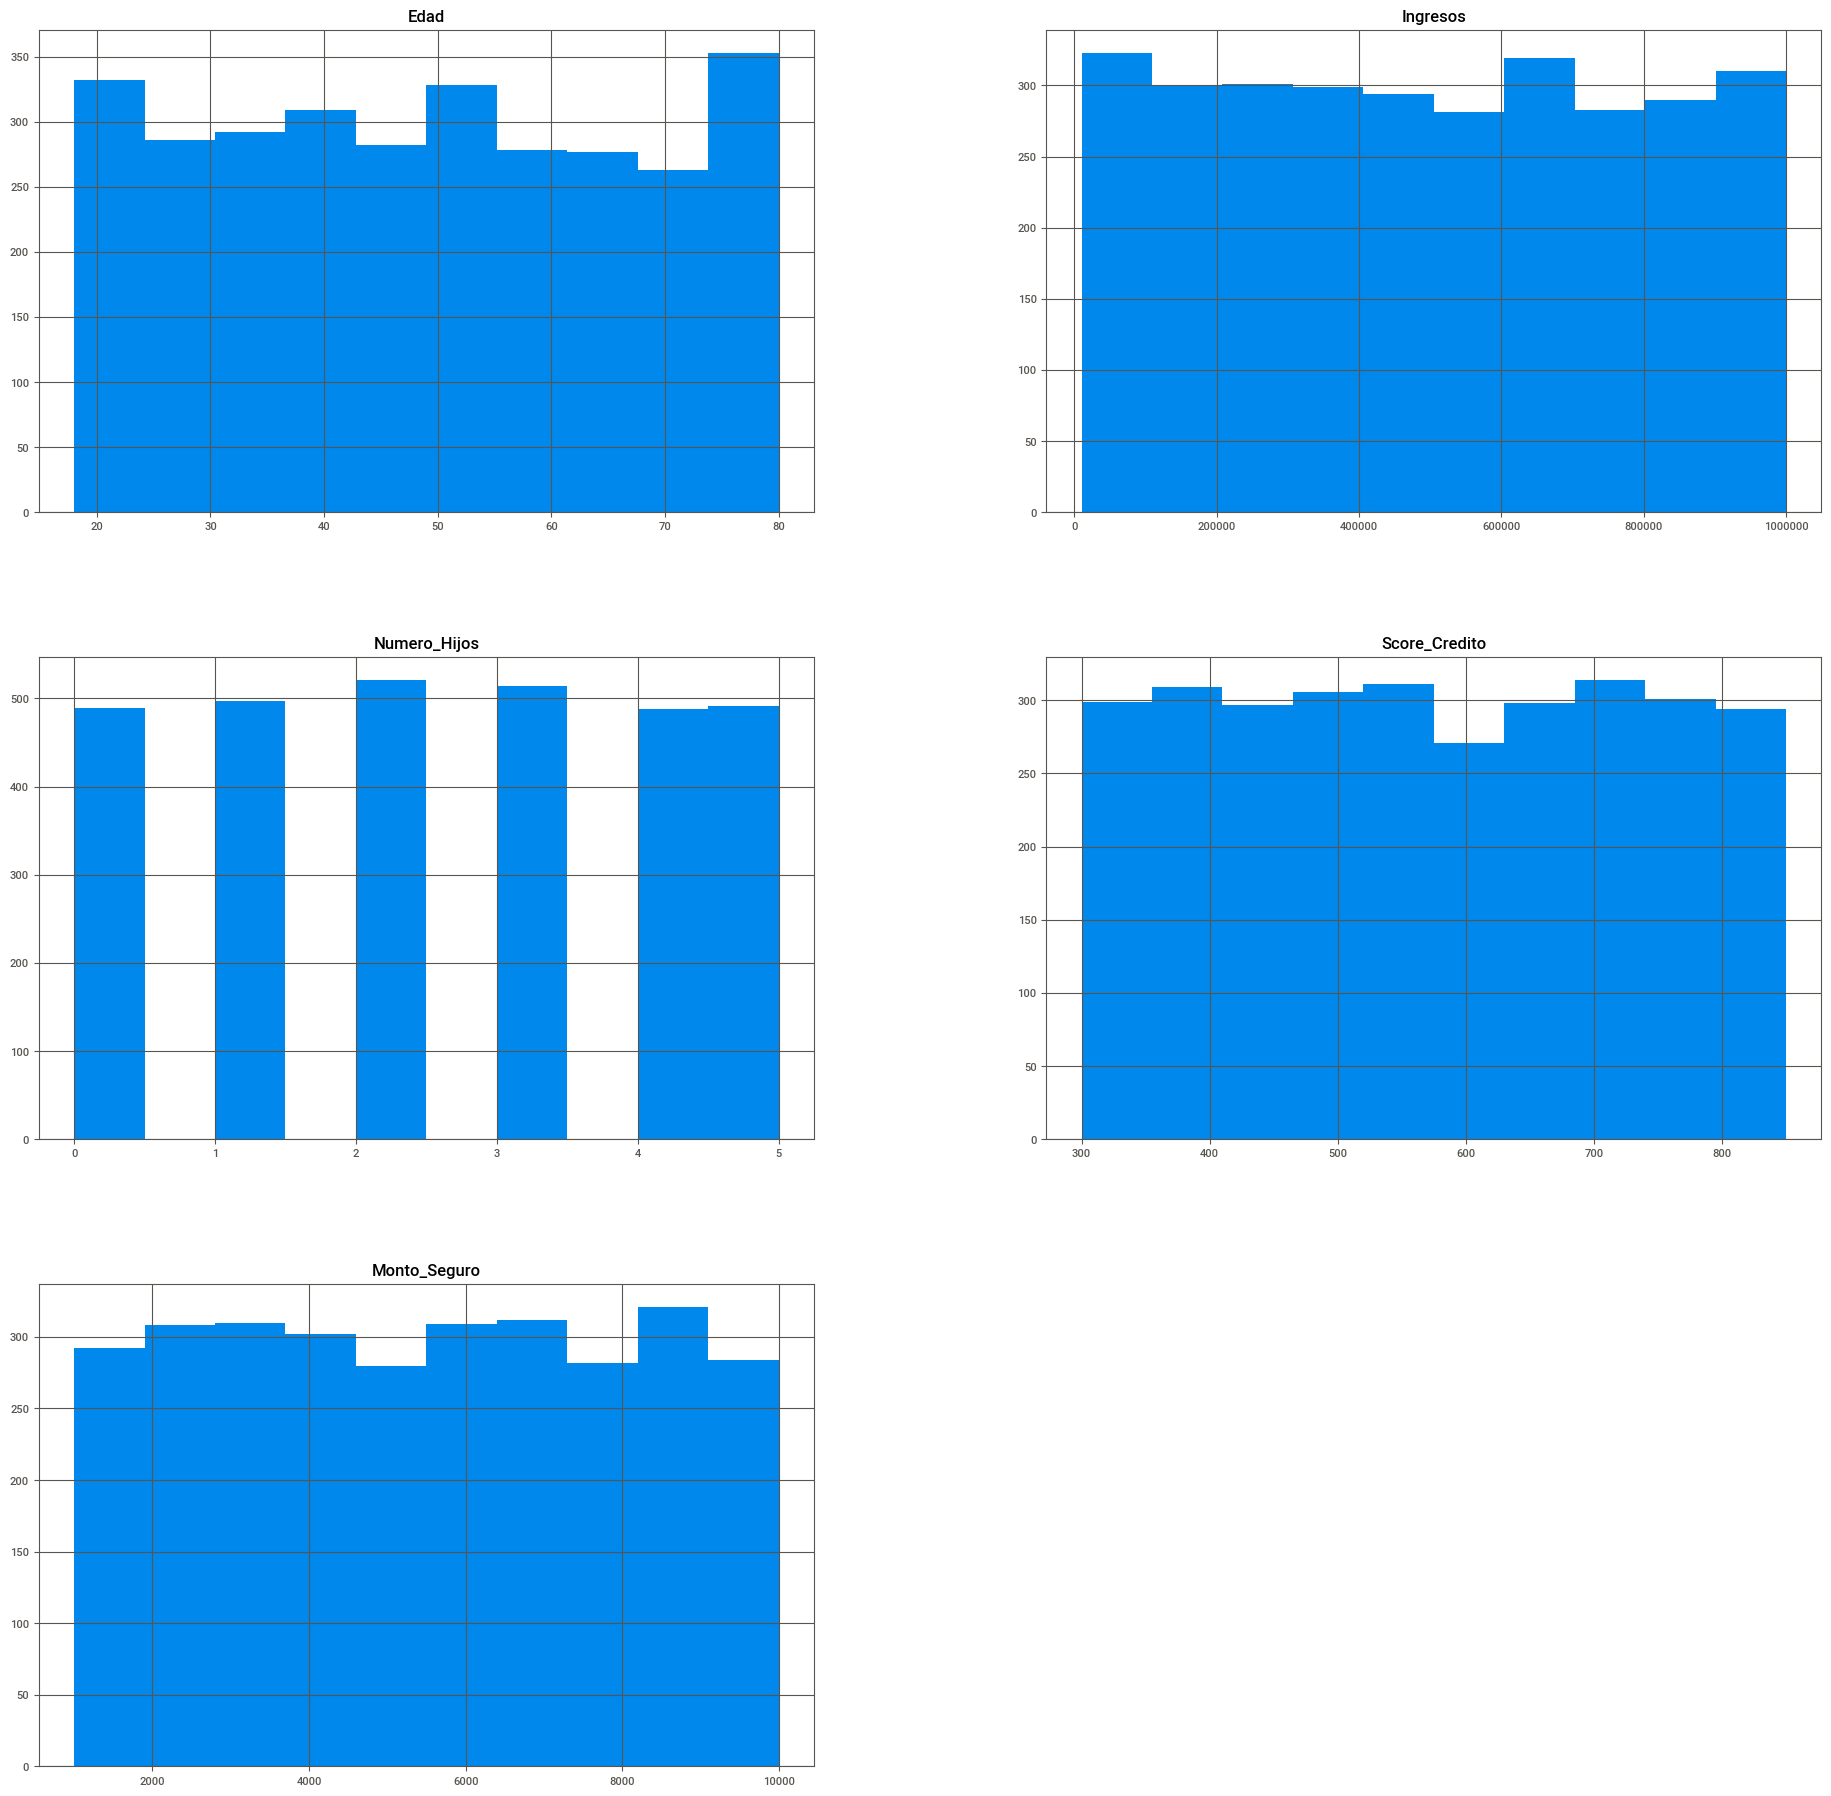

In [13]:
fig = plt.figure(figsize = (23,23))
ax = fig.gca()
data_num.hist(ax=ax)
plt.show()

### Prueba estadística de normalidad
- H0: La variable tiene distribución normal
- H1: La varaible no tiene distribución normal

In [14]:
# Contraste de Hipótesis de normalidad
lista_hn = []
col_hn = []
for col in data_num.columns:
    if (data_num[col].count()>=50):
        try:
            # D'Agostino's K-squared test
            k2, p_value = stats.normaltest(data_num[col].dropna())
            lista_hn.append([k2, p_value])
            col_hn.append(col)
        except:
            pass
    else:
        try:
            # shapiro
            k2, p_value = stats.shapiro(data_num[col].dropna())
            lista_hn.append([k2, p_value])
            col_hn.append(col)
        except:
            pass
hipotesis_normalidad = pd.DataFrame(lista_hn, columns=['Estadístico','p-valor'], index=col_hn)
hipotesis_normalidad

,Estadístico,p-valor
Edad,2334.417387,0.0
Ingresos,3116.133200,0.0
Numero_Hijos,3786.328547,0.0
Score_Credito,2976.354957,0.0
Monto_Seguro,2463.545751,0.0


- De aquí podemos observar que lo gráfico se condice con la prueba estadística, ninguna variable
  numérica de la data posee distribución normal

## Relación entre continuas y el target (Prueba U de ManWithney)
- H0: No existe relación entre la variable continua y el target
- H1: Existe relación entre la variable continua y el target

In [15]:
from methods_classes import Mann_Whitney

In [16]:
# Estadístico y p valor de la prueba
hipotesis_cont_indep = Mann_Whitney(data_var, data_num, "Reclamo_1a")
hipotesis_cont_indep

,Estadístico,p-valor
Edad,1088382.5,0.123231
Ingresos,1142003.0,0.471932
Numero_Hijos,1135142.0,0.662686
Score_Credito,1142712.0,0.453718
Monto_Seguro,1100725.0,0.307345


## Relación entre categóricas y el target (Prueba Chi Cuadrado)
- H0: No existe relación entre la variable categórica y el target
- H1: Existe relación entre la variable categórica y el target

In [17]:
from methods_classes import Chi_Square

In [18]:
# Estadístico y p valor de la prueba
hipotesis_cat_indep = Chi_Square(data_var, data_cat, "Reclamo_1a")
hipotesis_cat_indep

,Estadístico,p-valor
Sexo,2.819691,0.093114
Tipo_Hogar,0.106780,0.743841
Estado_Civil,3.191816,0.362986
Tipo_Trabajador,0.972523,0.614921
Educacion,0.321311,0.851586
Tipo_Seguro,1.916778,0.589858


- De las pruebas no paramétricas no tenemos variables relacionadas al target estadísticamente significativas, sin embargo, intentaremos encontrar un modelo que pueda extraer la mayor información de estas

# Análisis de Correlación

In [19]:
import seaborn as sns

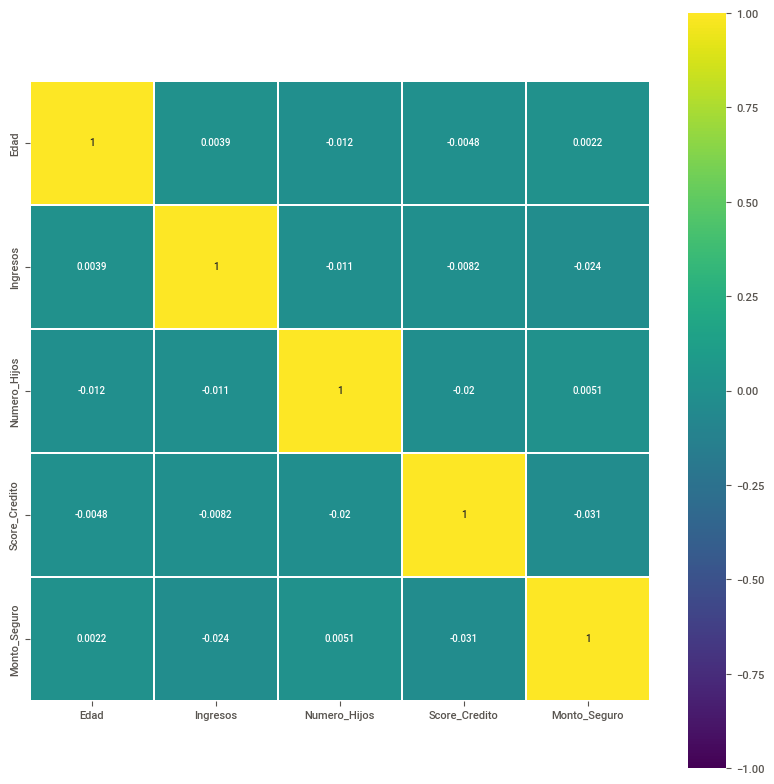

In [20]:
corr_before = data_num.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr_before, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 7}, square=True);

- Se puede corroborar de lo visto en sweetviz que no existe correlación entre las predictoras numéricas

# Identificar outliers por variable 

In [21]:
from methods_classes import encontrar_outliers, graficos, analisis_numerico

Cantidad de outliers Edad : 0
Media Edad : 48.83833333333333
Mediana Edad : 48.0
Q1 Edad : 33.0
Q3 Edad : 65.0
LI Edad : 18
LS Edad : 80
cuantil 0.01 Edad : 18.0
cuantil 0.99 Edad : 80.0
min Edad : 18
max Edad : 80


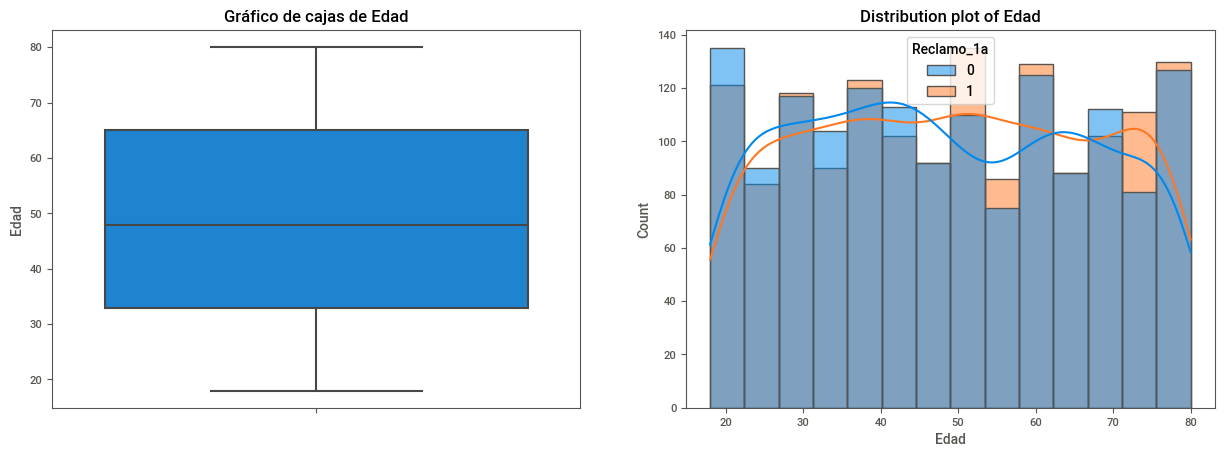

Cantidad de outliers Ingresos : 0
Media Ingresos : 500169.2
Mediana Ingresos : 498319.0
Q1 Ingresos : 241702.0
Q3 Ingresos : 748185.0
LI Ingresos : 10411
LS Ingresos : 999869
cuantil 0.01 Ingresos : 20170.89
cuantil 0.99 Ingresos : 988183.5399999999
min Ingresos : 10411
max Ingresos : 999869


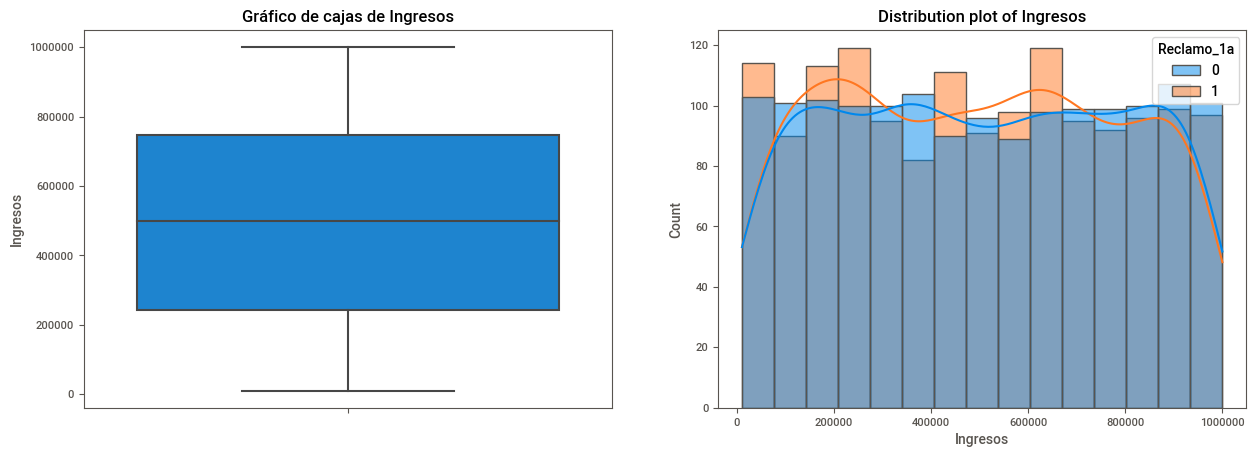

Cantidad de outliers Numero_Hijos : 0
Media Numero_Hijos : 2.496
Mediana Numero_Hijos : 2.0
Q1 Numero_Hijos : 1.0
Q3 Numero_Hijos : 4.0
LI Numero_Hijos : 0
LS Numero_Hijos : 5
cuantil 0.01 Numero_Hijos : 0.0
cuantil 0.99 Numero_Hijos : 5.0
min Numero_Hijos : 0
max Numero_Hijos : 5


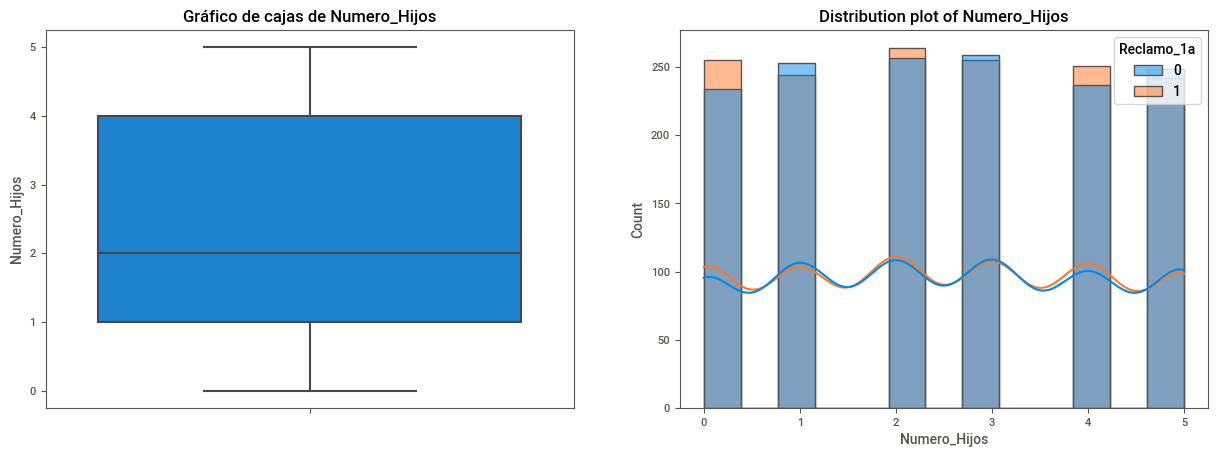

Cantidad de outliers Score_Credito : 0
Media Score_Credito : 573.7206666666667
Mediana Score_Credito : 571.0
Q1 Score_Credito : 435.75
Q3 Score_Credito : 712.0
LI Score_Credito : 300
LS Score_Credito : 850
cuantil 0.01 Score_Credito : 307.0
cuantil 0.99 Score_Credito : 845.0
min Score_Credito : 300
max Score_Credito : 850


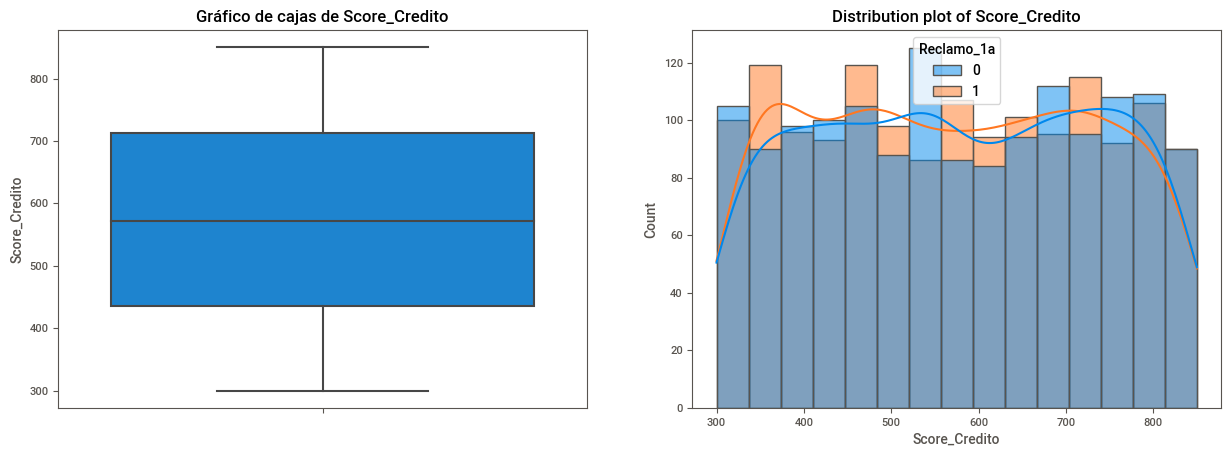

Cantidad de outliers Monto_Seguro : 0
Media Monto_Seguro : 5482.360333333333
Mediana Monto_Seguro : 5516.5
Q1 Monto_Seguro : 3260.25
Q3 Monto_Seguro : 7704.25
LI Monto_Seguro : 1001
LS Monto_Seguro : 9995
cuantil 0.01 Monto_Seguro : 1110.91
cuantil 0.99 Monto_Seguro : 9892.109999999997
min Monto_Seguro : 1001
max Monto_Seguro : 9995


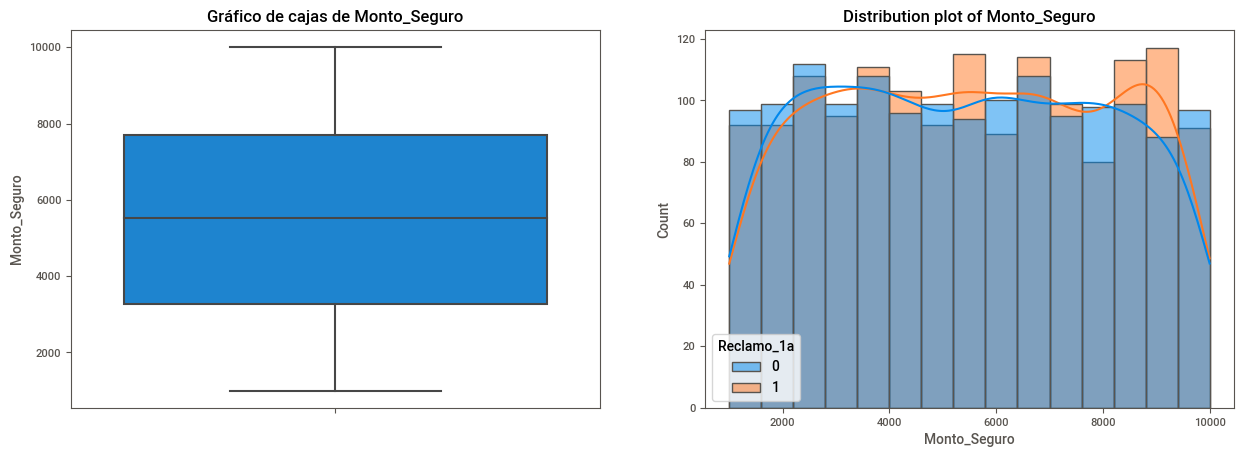

In [22]:
# Gráfico de cajas y distribución según target
for col in data_num.columns:
    analisis_numerico(data_var, col, 'Reclamo_1a')

- Observamos que ninguna variable numérica presenta outliers

# Modelamiento
- En este punto se utilizarán dos algoritmos, Logisitic Regression y Xgboost Classifier, debido a que el problema a tratar es un problema de clasificación binaria. El primero es un algoritmo clásico para este tipo de problemas que aumenta su rendimiento cuando se utiliza la metodología WoE y el último es un algoritmo de ML muy robusto para resolver este tipo de casos.

## Particionando los datos en train y test

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = data_exp
y = data_var['Reclamo_1a']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=101, stratify=y)

## Regresión Logística

In [25]:
from sklearn.linear_model import LogisticRegression

### WoE and IV experimental

In [26]:
from methods_classes import WoeExp

|	Information Value	|	Variable Predictiveness	|
|	:---				|	---:					|
|	Less than 0.02		|	Not useful				|
|	0.02 to 0.1			|	Weak predictive Power	|
|	0.1 to 0.3			|	Medium predictive Power	|
|	0.3 to 0.5			|	Strong predictive Power |
|	>0.5				|	Predictive Power		|

### Validación Cruzada en RLog usando WoE

In [27]:
from methods_classes import score_datas
from methods_classes import cross_validation_RLog_WoE
from methods_classes import results_cv

### RLog_SimpleImp_WoEexp

In [59]:
## Usamos RandomizeSearch para encontrar los mejores parámetros
grid_result_RLog_SimpleImp_WoEexp = cross_validation_RLog_WoE(X_train, y_train, 
                                                              None, WoeExp(), 5, 100)

In [31]:
## Mostramos los resultados del CV
results_cv(grid_result_RLog_SimpleImp_WoEexp)

,mean_test_score,std_test_score,mean_train_score,std_train_score
the_best,0.497143,0.011606,0.567381,0.006213


In [32]:
## Imprimimos el mejor estimador
grid_result_RLog_SimpleImp_WoEexp.best_estimator_.get_params()['steps']

[('WoE', WoeExp(bins=15, threshold=0.02)),
 ('RLog', LogisticRegression(C=4, max_iter=50, penalty='l1', solver='saga'))]

In [28]:
# Entrenamos con el mejor WoeExp según el CV y transformamos el train
Woe_Exp = WoeExp(bins=15, threshold=0.02, show_woe=True)
iv_WoeExp, Woe_WoeExp = Woe_Exp.fit(X_train, y_train)
X_train_WoeExp = Woe_Exp.transform(X_train)

  Variable     Cutoff     N  Events  % of Events  Non-Events  % of Non-Events  \
0     Sexo   Femenino  1047     515     0.486767         532         0.510557   
1     Sexo  Masculino  1053     543     0.513233         510         0.489443   

        WoE        IV  
0 -0.047715  0.001135  
1  0.047460  0.001129  


   Variable          Cutoff    N  Events  % of Events  Non-Events  \
0      Edad  (17.999, 21.0]  146      67     0.063327          79   
1      Edad    (21.0, 26.0]  140      68     0.064272          72   
2      Edad    (26.0, 31.0]  165      83     0.078450          82   
3      Edad    (31.0, 35.0]  137      63     0.059546          74   
4      Edad    (35.0, 39.0]  139      77     0.072779          62   
5      Edad    (39.0, 42.0]  121      56     0.052930          65   
6      Edad    (42.0, 46.0]  149      67     0.063327          82   
7      Edad    (46.0, 50.0]  129      61     0.057656          68   
8      Edad    (50.0, 55.0]  152      89     0.084121        

In [29]:
# Valor de influencia de cada variable de la transformación WoeExp óptima según el CV
iv_WoeExp.sort_values(['IV'], ascending = False)

,Variable,IV
0,Edad,0.032944
0,Score_Credito,0.028946
0,Ingresos,0.026848
0,Monto_Seguro,0.012673
0,Tipo_Seguro,0.010874
0,Numero_Hijos,0.006486
0,Estado_Civil,0.002655
0,Sexo,0.002264
0,Tipo_Trabajador,0.000929
0,Tipo_Hogar,0.000092


In [30]:
## Transformamos la data de testeo tal y como hicimos con la de train
## utilizando meteodología WoE con los mejores parámetros
X_test_WoeExp = Woe_Exp.transform(X_test)

################################################### TRAIN SCORE ###################################################
F1 Train score:  0.5570216776625825
GINI Train score:  0.1615186731928202
              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1042
           1       0.56      0.56      0.56      1058

    accuracy                           0.55      2100
   macro avg       0.55      0.55      0.55      2100
weighted avg       0.55      0.55      0.55      2100



C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


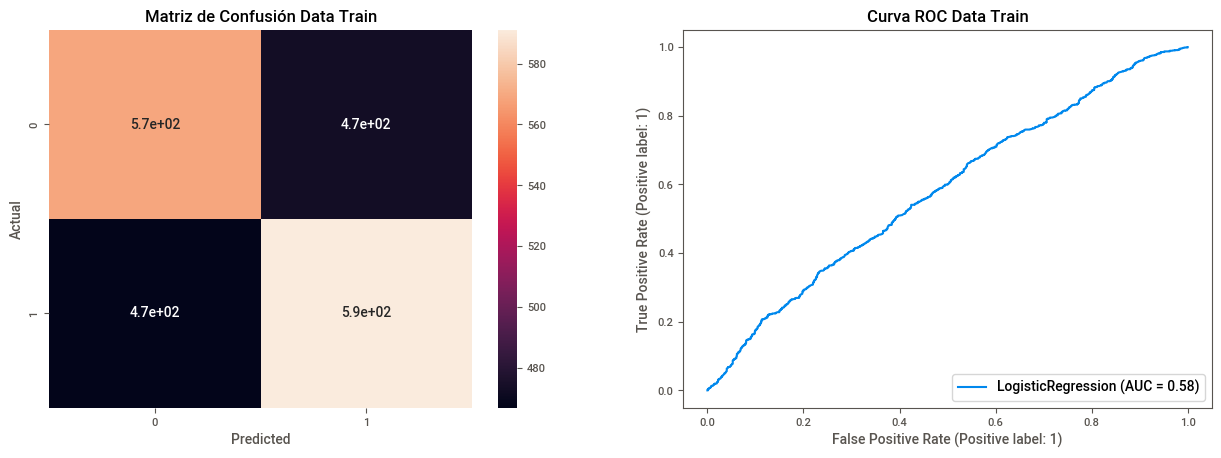



################################################### TEST SCORE ###################################################
F1 Test score:  0.5243362831858407
GINI Test score:  0.03612506234845014
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       447
           1       0.53      0.52      0.52       453

    accuracy                           0.52       900
   macro avg       0.52      0.52      0.52       900
weighted avg       0.52      0.52      0.52       900



C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


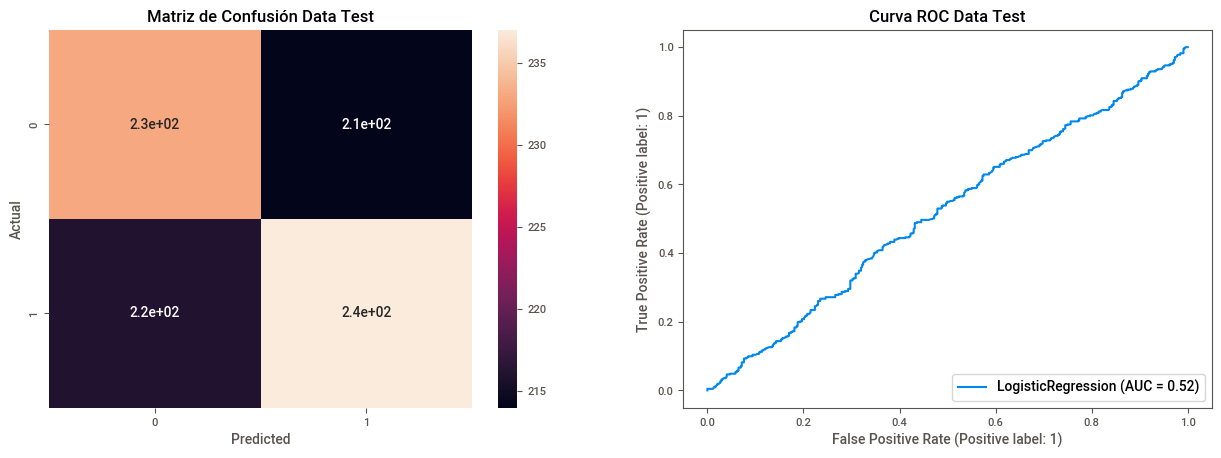



                                F1 Score  Precision    Recall      GINI
Data Train RLog SimpImp_WoeExp  0.557022   0.555451  0.558601  0.161519
Data Test RLog SimpImp_WoeExp   0.524336   0.525499  0.523179  0.036125


In [31]:
## Entrenamos el modelo con la data train y con los mejores parámetros según RandomizeSearch y 
## mostramos resultados

logmodel1 = LogisticRegression(C=4, max_iter=50, penalty='l1', solver='saga')
logmodel1.fit(X_train_WoeExp, y_train)
result_RLog1, pred_RLog1, pred_proba_RLog1 = score_datas(logmodel1,
                                                         X_train_WoeExp,
                                                         y_train,
                                                         X_test_WoeExp,
                                                         y_test,
                                                         'RLog SimpImp_WoeExp')

### Transformación, estandarización y codificación

In [32]:
from sklearn.pipeline import Pipeline

### Transformación de variables numéricas

In [33]:
from methods_classes import TransformVar

### Estandarización

In [34]:
## Creamos un clase con el estandarizador para que incluya en sus inputs
## y outputs las variables categóricas
from methods_classes import Estandarice

### Codificación de variables categóricas
- Weight of Evidence https://contrib.scikit-learn.org/category_encoders/woe.html
- https://medium.com/analytics-vidhya/categorical-variable-encoding-techniques-17e607fe42f9
- https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931

In [35]:
  from methods_classes import CategoryEncoders

### Validación Cruzada en RLog usando Transformación, estandarización y codificación de variables categóricas

In [36]:
from methods_classes import cross_validation_RLog_Treated

### RLog_CodWoE_IterImp

In [39]:
## Usamos RandomizeSearch para encontrar los mejores parámetros
grid_result_RLog_WoE_IterImp = cross_validation_RLog_Treated(X_train, y_train,
                                                             TransformVar(),
                                                             CategoryEncoders(),
                                                             Estandarice(),
                                                             'WoE_IterImp',
                                                             cv=5, n_iter=50)

In [40]:
results_cv(grid_result_RLog_WoE_IterImp)

,mean_test_score,std_test_score,mean_train_score,std_train_score
the_best_elastic_net,0.508095,0.005345,0.527381,0.004564
the_best_l2,0.513333,0.009595,0.519167,0.006686
the_best_l1,0.506190,0.003563,0.525238,0.003869


In [41]:
## Imprimimos el mejor estimador
grid_result_RLog_WoE_IterImp['l2'].best_estimator_.get_params()['steps']

[('TransVar', TransformVar(method='yeo-johnson')),
 ('CatEnc', CategoryEncoders(bins=20, threshold=0.1)),
 ('Estandarice', Estandarice()),
 ('RLog', LogisticRegression(C=4, l1_ratio=0.7, max_iter=10, solver='sag'))]

In [42]:
# Entrenamos con la mejor combinación según el CV para transformar el train y el test
pipe_RLog_WoE_IterImp = Pipeline(steps=[('TransVar', TransformVar(method='yeo-johnson')),
                                        ('CatEnc', CategoryEncoders(bins=20, threshold=0.1)),
                                        ('Estandarice', Estandarice())])
pipe_RLog_WoE_IterImp.fit(X_train, y_train)
X_train_RLog_WoE_IterImp = pipe_RLog_WoE_IterImp.transform(X_train)
X_test_RLog_WoE_IterImp = pipe_RLog_WoE_IterImp.transform(X_test)

################################################### TRAIN SCORE ###################################################
F1 Train score:  0.5135011441647597
GINI Train score:  0.013276054120148428
              precision    recall  f1-score   support

           0       0.49      0.46      0.47      1042
           1       0.50      0.53      0.51      1058

    accuracy                           0.49      2100
   macro avg       0.49      0.49      0.49      2100
weighted avg       0.49      0.49      0.49      2100



C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1109: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


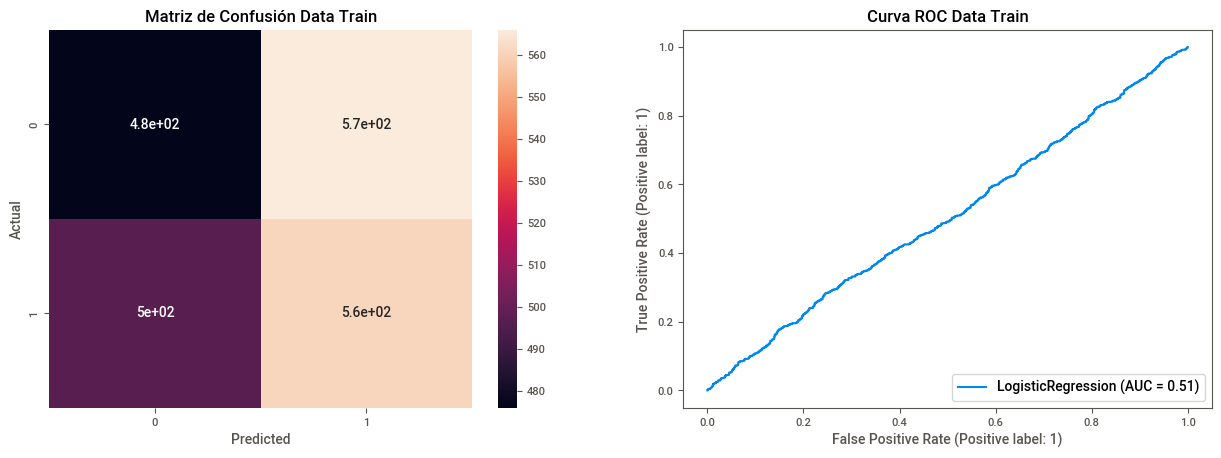



################################################### TEST SCORE ###################################################
F1 Test score:  0.4884488448844885
GINI Test score:  -0.03200636077652841
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       447
           1       0.49      0.49      0.49       453

    accuracy                           0.48       900
   macro avg       0.48      0.48      0.48       900
weighted avg       0.48      0.48      0.48       900



C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


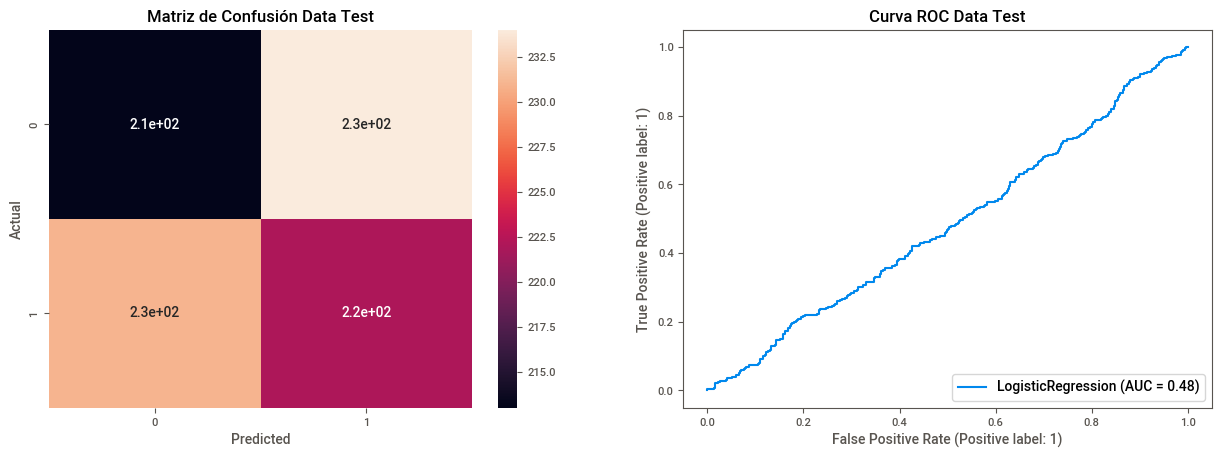



                                F1 Score  Precision    Recall      GINI
Data Train RLog CodWoE_IterImp  0.513501   0.497782  0.530246  0.013276
Data Test RLog CodWoE_IterImp   0.488449   0.486842  0.490066 -0.032006


In [43]:
## Entrenamos el modelo con la data train y con los mejores parámetros según RandomizeSearch y 
## mostramos resultados

logmodel3 = LogisticRegression(C=4, l1_ratio=0.7, max_iter=10, solver='sag')
logmodel3.fit(X_train_RLog_WoE_IterImp, y_train)
result_RLog3, pred_RLog3, pred_proba_RLog3 = score_datas(logmodel3,
                                                         X_train_RLog_WoE_IterImp,
                                                         y_train,
                                                         X_test_RLog_WoE_IterImp,
                                                         y_test,
                                                         'RLog CodWoE_IterImp')

### RLog_CodGLMM_IterImp

In [46]:
# Usamos RandomizeSearch para encontrar los mejores parámetros
grid_result_RLog_GLMM_IterImp = cross_validation_RLog_Treated(X_train, y_train,
                                                              TransformVar(),
                                                              CategoryEncoders(),
                                                              Estandarice(),
                                                              'GLMM_IterImp',
                                                              cv=5, n_iter=100)

In [47]:
results_cv(grid_result_RLog_GLMM_IterImp)

,mean_test_score,std_test_score,mean_train_score,std_train_score
the_best_elastic_net,0.523333,0.018467,0.524524,0.005702
the_best_l2,0.509524,0.028132,0.536310,0.006650
the_best_l1,0.510000,0.025969,0.537143,0.007656


In [48]:
## Imprimimos el mejor estimador
grid_result_RLog_GLMM_IterImp['elastic_net'].best_estimator_.get_params()['steps']

[('TransVar', TransformVar(method='QuantileTransformer')),
 ('CatEnc', CategoryEncoders(method='GLMMEncoder')),
 ('Estandarice', Estandarice()),
 ('RLog',
  LogisticRegression(C=0.01, l1_ratio=0.3, max_iter=500, penalty='elasticnet',
                     solver='saga'))]

In [49]:
# Entrenamos con la mejor combinación según el CV para transformar el train y el test
pipe_RLog_GLMM_IterImp = Pipeline(steps=[('TransVar', TransformVar(method='QuantileTransformer')),
                                         ('CatEnc', CategoryEncoders(method='GLMMEncoder')),
                                         ('Estandarice', Estandarice())])
pipe_RLog_GLMM_IterImp.fit(X_train, y_train)
X_train_RLog_GLMM_IterImp = pipe_RLog_GLMM_IterImp.transform(X_train)
X_test_RLog_GLMM_IterImp = pipe_RLog_GLMM_IterImp.transform(X_test)

################################################### TRAIN SCORE ###################################################
F1 Train score:  0.6189024390243903
GINI Train score:  0.06596210573675032
              precision    recall  f1-score   support

           0       0.54      0.28      0.37      1042
           1       0.52      0.77      0.62      1058

    accuracy                           0.52      2100
   macro avg       0.53      0.52      0.49      2100
weighted avg       0.53      0.52      0.49      2100



C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


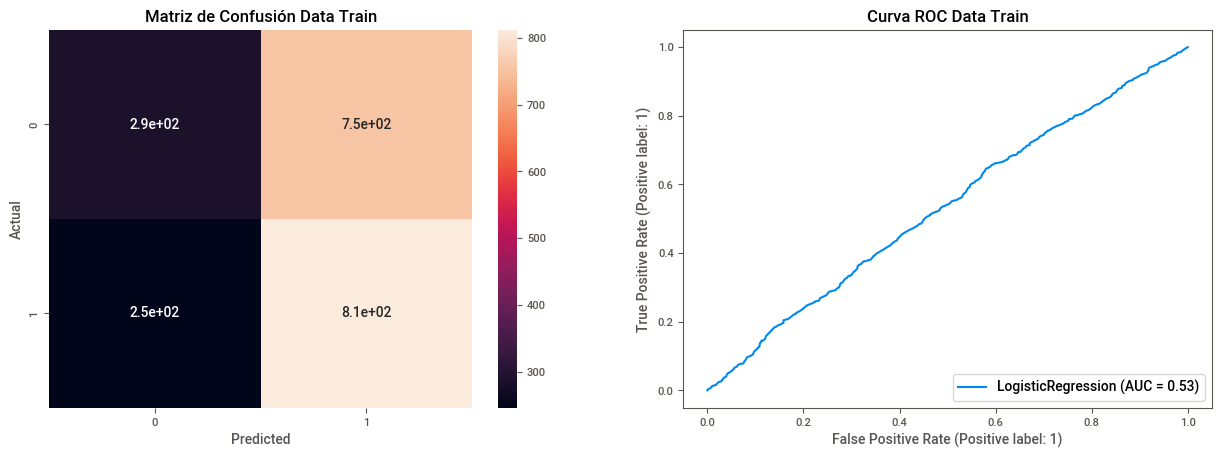



################################################### TEST SCORE ###################################################
F1 Test score:  0.5822784810126581
GINI Test score:  -0.04617489172358291
              precision    recall  f1-score   support

           0       0.47      0.26      0.33       447
           1       0.49      0.71      0.58       453

    accuracy                           0.49       900
   macro avg       0.48      0.49      0.46       900
weighted avg       0.48      0.49      0.46       900



C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


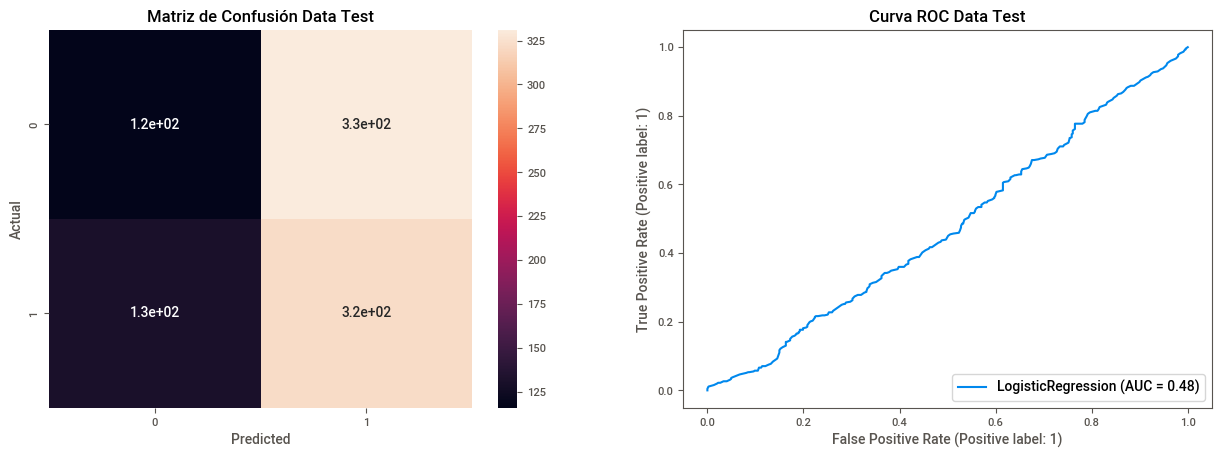



                                 F1 Score  Precision    Recall      GINI
Data Train RLog CodGLMM_IterImp  0.618902   0.518519  0.767486  0.065962
Data Test RLog CodGLMM_IterImp   0.582278   0.493109  0.710817 -0.046175


In [50]:
## Entrenamos el modelo con la data train y con los mejores parámetros según RandomizeSearch y 
## mostramos resultados

logmodel6 = LogisticRegression(C=0.01, l1_ratio=0.3, max_iter=500, penalty='elasticnet',
                               solver='saga')
logmodel6.fit(X_train_RLog_GLMM_IterImp, y_train)
result_RLog6, pred_RLog6, pred_proba_RLog6 = score_datas(logmodel6, 
                                                         X_train_RLog_GLMM_IterImp, 
                                                         y_train,
                                                         X_test_RLog_GLMM_IterImp,
                                                         y_test,
                                                         'RLog CodGLMM_IterImp')

### 3.2.13. Resultados Regresión Logística

In [51]:
from methods_classes import summary

In [52]:
results_RLog = pd.concat([result_RLog1, result_RLog3, result_RLog6], 
                         axis=0)
## Mostramos los resultados usando la función anterior y ordenando de acuerdo al GINI
summary(results_RLog).sort_values(['GINI Test'],ascending=False)

C:\Users\Leonardo Salazar\Desktop\archivos\Transferir 2\TRABAJO\Empresas\FREELANCE\ZLTECH\Prueba_Tecnica\Data-Science-Challenge\methods_classes.py:1154: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_results_test.set_axis(new_col_test,axis='columns', inplace=True)
C:\Users\Leonardo Salazar\Desktop\archivos\Transferir 2\TRABAJO\Empresas\FREELANCE\ZLTECH\Prueba_Tecnica\Data-Science-Challenge\methods_classes.py:1155: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_results_train.set_axis(new_col_train,axis='columns', inplace=True)


,F1 Score Train,Precision Train,Recall Train,GINI Train,F1 Score Test,Precision Test,Recall Test,GINI Test,Dif_GINI
RLog SimpImp_WoeExp,0.557022,0.555451,0.558601,0.161519,0.524336,0.525499,0.523179,0.036125,0.125394
RLog CodWoE_IterImp,0.513501,0.497782,0.530246,0.013276,0.488449,0.486842,0.490066,-0.032006,0.045282
RLog CodGLMM_IterImp,0.618902,0.518519,0.767486,0.065962,0.582278,0.493109,0.710817,-0.046175,0.112137


## XGBOOST

In [53]:
from xgboost import XGBClassifier, plot_tree

- Observación: Para guardar la interpretabilidad de los resultados del modelo, no usaremos PCA

### Validación Cruzada en XGB usando Transformación, estandarización y codificación de variables categóricas

In [54]:
from methods_classes import cross_validation_XGB_Treated

### XGB_CodCatBoost_IterImp

In [65]:
## Usamos RandomizeSearch para encontrar los mejores parámetros
grid_result_XGB_CatBoost_IterImp = cross_validation_XGB_Treated(X_train, y_train,
                                                                TransformVar(),
                                                                CategoryEncoders(),
                                                                Estandarice(),
                                                                'CatBoost_IterImp',
                                                                cv=5, n_iter=200)

[21:25:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:25:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:25:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:25:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:25:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:26:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:28:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:28:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:28:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:28:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[21:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

In [66]:
results_cv(grid_result_XGB_CatBoost_IterImp)

,mean_test_score,std_test_score,mean_train_score,std_train_score
the_best,0.508095,0.021328,0.536071,0.010764


In [67]:
## Imprimimos el mejor estimador
grid_result_XGB_CatBoost_IterImp.best_estimator_.get_params()['steps']

[('TransVar', TransformVar()),
 ('CatEnc', CategoryEncoders(method='CatBoostEncoder')),
 ('Estandarice', Estandarice()),
 ('XGB',
  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1.0, colsample_bynode=1, colsample_bytree=0.6,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=1.0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='',
                learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
                max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=13,
                missing=nan, monotone_constraints='()', n_estimators=50,
                n_jobs=15, num_parallel_tree=1, predictor='auto', random_state=0,
                reg_alpha=0, reg_lambda=500.0, ...))]

In [69]:
## Imprimimos el mejor estimador
grid_result_XGB_CatBoost_IterImp.best_estimator_.get_params()['XGB'].get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1.0,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 1.0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 2,
 'max_leaves': 0,
 'min_child_weight': 13,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 50,
 'n_jobs': 15,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 500.0,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 0.6,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'silent': False}

In [68]:
# Entrenamos con la mejor combinación según el CV para transformar el train y el test
pipe_XGB_CatBoost_IterImp = Pipeline(steps=[('TransVar', TransformVar()),
                                            ('CatEnc', CategoryEncoders(method='CatBoostEncoder')),
                                            ('Estandarice', Estandarice())])
pipe_XGB_CatBoost_IterImp.fit(X_train, y_train)
X_train_XGB_CatBoost_IterImp = pipe_XGB_CatBoost_IterImp.transform(X_train)
X_test_XGB_CatBoost_IterImp = pipe_XGB_CatBoost_IterImp.transform(X_test)

[21:35:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


################################################### TRAIN SCORE ###################################################
F1 Train score:  0.5926544240400667
GINI Train score:  0.10895144933583456
              precision    recall  f1-score   support

           0       0.54      0.40      0.46      1042
           1       0.53      0.67      0.59      1058

    accuracy                           0.54      2100
   macro avg       0.54      0.53      0.53      2100
weighted avg       0.54      0.54      0.53      2100



C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


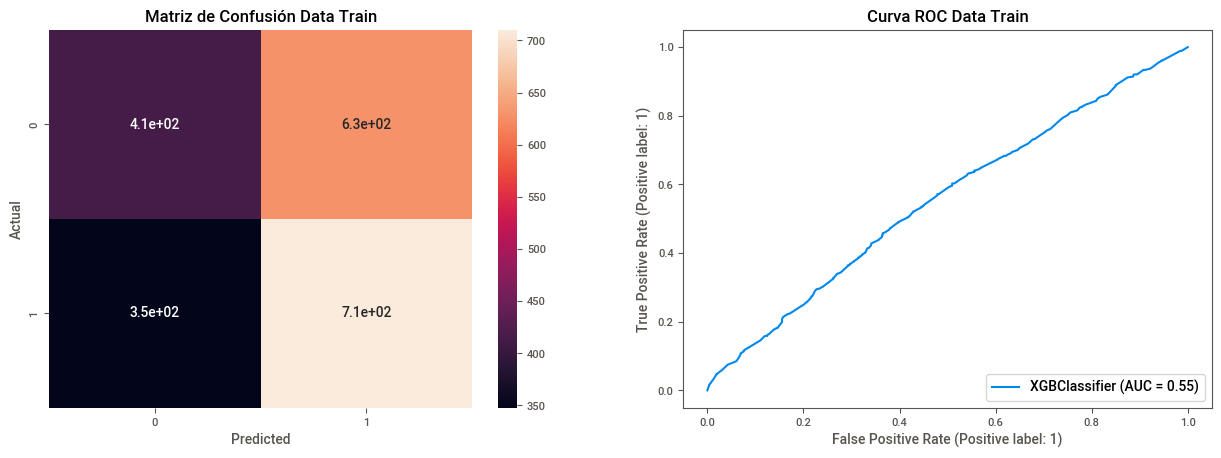

C:\Users\Leonardo Salazar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)




################################################### TEST SCORE ###################################################
F1 Test score:  0.5663010967098704
GINI Test score:  -0.0018618111422236128
              precision    recall  f1-score   support

           0       0.52      0.40      0.45       447
           1       0.52      0.63      0.57       453

    accuracy                           0.52       900
   macro avg       0.52      0.52      0.51       900
weighted avg       0.52      0.52      0.51       900



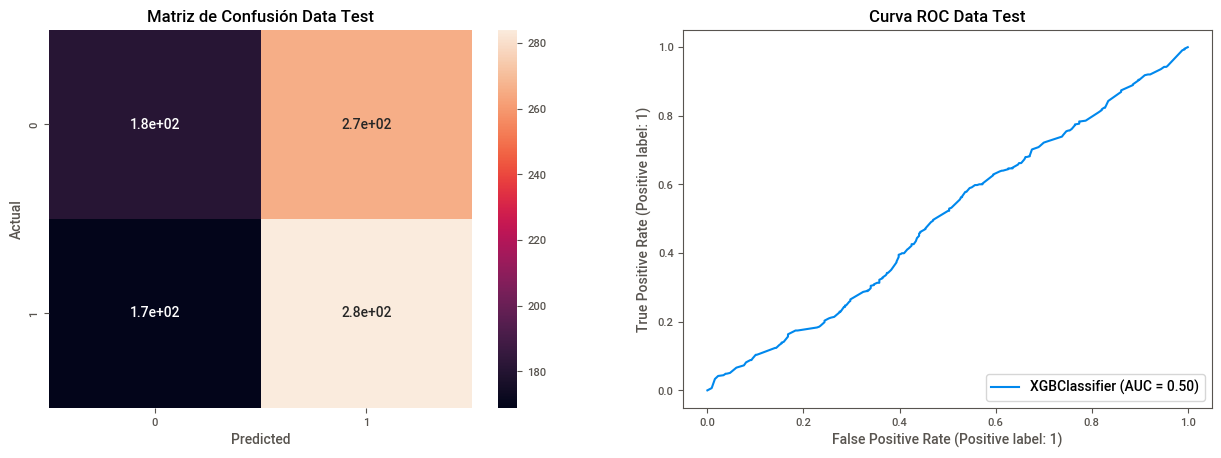



                                    F1 Score  Precision    Recall      GINI
Data Train XGB CodCatBoost_IterImp  0.592654   0.530643  0.671078  0.108951
Data Test XGB CodCatBoost_IterImp   0.566301   0.516364  0.626932 -0.001862


In [89]:
## Entrenamos el modelo con la data train y con los mejores parámetros según RandomizeSearch y 
## mostramos resultados

XGB1 = XGBClassifier(silent = False, n_jobs=15,
                     objective = 'binary:logistic', max_depth=2, learning_rate=0.01, 
                     subsample=0.6, colsample_bytree=0.6, colsample_bylevel=1, 
                     min_child_weight=13, gamma=1, reg_lambda=400, n_estimators=15)

XGB1.fit(X_train_XGB_CatBoost_IterImp, y_train)
result_XGB1, pred_XGB1, pred_proba_XGB1 = score_datas(XGB1, 
                                                      X_train_XGB_CatBoost_IterImp, 
                                                      y_train,
                                                      X_test_XGB_CatBoost_IterImp,
                                                      y_test,
                                                      'XGB CodCatBoost_IterImp')

### 3.3.8. Resultados XGBoost

In [90]:
results_XGB = pd.concat([result_XGB1], axis=0)
## Mostramos los resultados usando la función anterior y ordenando de acuerdo al GINI
summary(results_XGB).sort_values(['GINI Test'], ascending=False)

C:\Users\Leonardo Salazar\Desktop\archivos\Transferir 2\TRABAJO\Empresas\FREELANCE\ZLTECH\Prueba_Tecnica\Data-Science-Challenge\methods_classes.py:1154: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_results_test.set_axis(new_col_test,axis='columns', inplace=True)
C:\Users\Leonardo Salazar\Desktop\archivos\Transferir 2\TRABAJO\Empresas\FREELANCE\ZLTECH\Prueba_Tecnica\Data-Science-Challenge\methods_classes.py:1155: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_results_train.set_axis(new_col_train,axis='columns', inplace=True)


,F1 Score Train,Precision Train,Recall Train,GINI Train,F1 Score Test,Precision Test,Recall Test,GINI Test,Dif_GINI
XGB CodCatBoost_IterImp,0.592654,0.530643,0.671078,0.108951,0.566301,0.516364,0.626932,-0.001862,0.110813


## 3.4. Resultados Generales

In [91]:
results = pd.concat([results_RLog, results_XGB], axis=0)
## Mostramos los resultados usando la función anterior y ordenando de acuerdo al GINI
summary(results).sort_values(['GINI Test', 'Dif_GINI'], ascending=[False, True])

C:\Users\Leonardo Salazar\Desktop\archivos\Transferir 2\TRABAJO\Empresas\FREELANCE\ZLTECH\Prueba_Tecnica\Data-Science-Challenge\methods_classes.py:1154: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_results_test.set_axis(new_col_test,axis='columns', inplace=True)
C:\Users\Leonardo Salazar\Desktop\archivos\Transferir 2\TRABAJO\Empresas\FREELANCE\ZLTECH\Prueba_Tecnica\Data-Science-Challenge\methods_classes.py:1155: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_results_train.set_axis(new_col_train,axis='columns', inplace=True)


,F1 Score Train,Precision Train,Recall Train,GINI Train,F1 Score Test,Precision Test,Recall Test,GINI Test,Dif_GINI
RLog SimpImp_WoeExp,0.557022,0.555451,0.558601,0.161519,0.524336,0.525499,0.523179,0.036125,0.125394
XGB CodCatBoost_IterImp,0.592654,0.530643,0.671078,0.108951,0.566301,0.516364,0.626932,-0.001862,0.110813
RLog CodWoE_IterImp,0.513501,0.497782,0.530246,0.013276,0.488449,0.486842,0.490066,-0.032006,0.045282
RLog CodGLMM_IterImp,0.618902,0.518519,0.767486,0.065962,0.582278,0.493109,0.710817,-0.046175,0.112137


- El mejor modelo es el segundo de este cuadro, debido a que presenta la mejor Precision y F1 Score, respecto a los demás. Además, es estable, ya que la diferencia entre el GINI de train y de test está alrededor de 0.1 y por lo tanto logra generalizar. El GINI nos indica qué tan buenas son las probabilidades predichas y el F1 Score resume la precisión y recall en un solo valor, esto significa que el modelo es capaz de detectar el 63% de casos donde realmente habrá un reclamo, consiguiendo una efectividad en torno al 52%, esto permitirá optimizar y enfocar los recursos en perfiles donde el modelo prediga que se realizará un reclamo, sobre todo en los más probables.

# 4. Insights

In [92]:
#!pip install shap
import shap

In [115]:
# Calculamos los valores shap
explainer = shap.Explainer(XGB1)
shap_values = explainer(X_test_XGB_CatBoost_IterImp[X_test.columns])

# Guardamos la data original en shap
shap_values.display_data = X_test.values

# explainer con data transformada
encode_shap_values = explainer(X_test_XGB_CatBoost_IterImp[X_test.columns])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


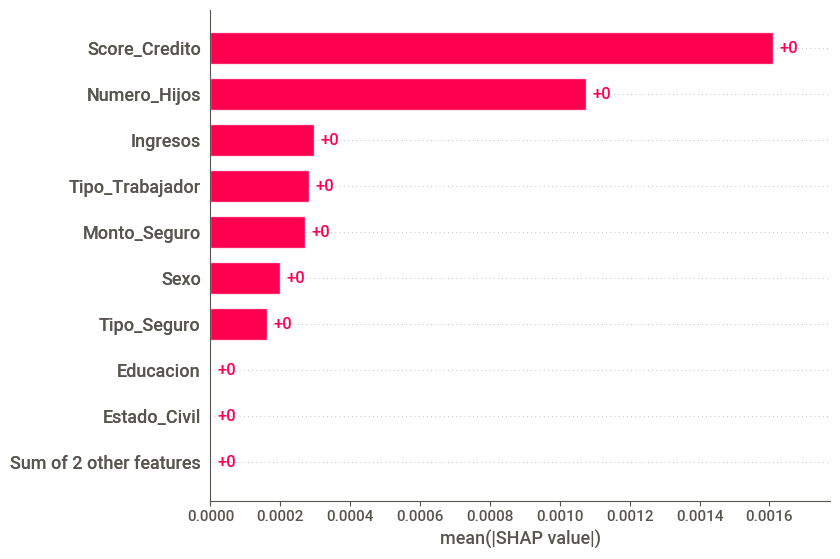

In [121]:
# Importancia de variables según valores promedio shap
shap.plots.bar(shap_values, max_display = 10)

- El Score Crediticio de un cliente es la variables más determinante a la hora de evaluar si este podrá realizar un reclamo o no.
- La Score Crediticio y el Número de Hijos son variables que determinan a un 90% la decisión del modelo.

In [122]:
# Se muestran los valores de cada variables en la data que fue procesada por el modelo
# comparados con sus respectivos valores reales en la data original
df_vals = dict()
for col in X_test.columns:
    real_data = pd.DataFrame(shap_values[:, col].display_data, 
                             columns = [col])
    trans_data = pd.DataFrame(shap_values[:, col].data, 
                              columns = ['encoder_' + col])
    real_trans = pd.concat([real_data, trans_data], axis=1)
    real_trans.drop_duplicates(inplace=True)
    real_trans.sort_values(['encoder_' + col], ascending= False, inplace=True)
    df_vals[col] = real_trans.reset_index(drop=True).dropna()
    print(df_vals[col])
    print("\n")

        Sexo  encoder_Sexo
0  Masculino      0.997147
1   Femenino     -1.002861


   Edad  encoder_Edad
0    80      1.698595
1    79      1.643732
2    78      1.588868
3    77      1.534005
4    76      1.479142
..  ...           ...
58   22     -1.483479
59   21     -1.538342
60   20     -1.593205
61   19     -1.648069
62   18     -1.702932

[63 rows x 2 columns]


    Ingresos  encoder_Ingresos
0     998978          1.744655
1     998832          1.744149
2     998267          1.742189
3     995016          1.730915
4     994878          1.730437
..       ...               ...
895    12947         -1.674753
896    11160         -1.680950
897    10605         -1.682875
898    10474         -1.683329
899    10411         -1.683547

[900 rows x 2 columns]


     Tipo_Hogar  encoder_Tipo_Hogar
0  Departamento            1.002861
1          Casa           -0.997147


  Estado_Civil  encoder_Estado_Civil
0       Casado              1.269058
1        Viudo              0.410119
2      So

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


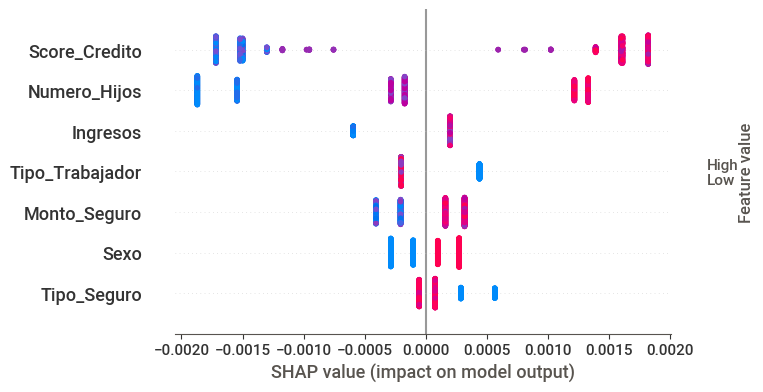

In [125]:
# Impacto de la magnitud de cada variable sobre el modelo
shap.summary_plot(shap_values, max_display = 7)

- Podemos concluir según el modelo, que:\
  \
  Los hombres son más propensos a realizar un reclamo.\
  \
  A mayores ingresos mayor propensión a hacer un reclamos.\
  \
  Las personas con más hijos presentan mayor propensión a realizar un reclamo.\
  \
  A mayor score crediticio mayor propensión a realizar un reclamo.\
  \
  Los trabajadores independientes tienen mayor propensión a realizar un reclamo que los dependientes o empresarios.\
  \
  Los clientes con Seguro Vida son menos propensos a realizar un reclamo con respecto a los clientes con otro tipo de seguro.\
  \
  Monto_Seguro: Mientras mayor sea el monto del seguro del cliente, mayor probabilidad tendrá a realizar un reclamo.

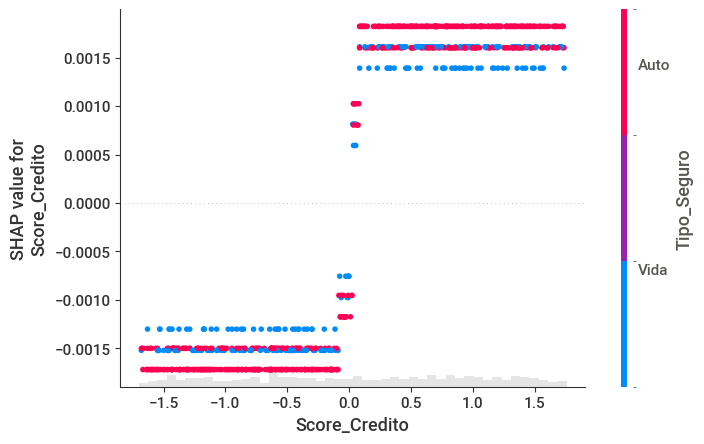

In [126]:
# Insights interesantes respecto al ingreso
shap.plots.scatter(shap_values[:,"Score_Credito"], color=shap_values)

In [135]:
# Identificando la codificación Shap para interpretación
df_vals["Score_Credito"][(df_vals["Score_Credito"].encoder_Score_Credito <= 0.01) 
                         & (df_vals["Score_Credito"].encoder_Score_Credito >= -0.01)]

,Score_Credito,encoder_Score_Credito
224,572,0.009515
225,570,-0.002904
226,569,-0.009113


- Los clientes con un score crediticio mayor a 572 y que pertenecen a Seguro Salud u Hogar son más propensos que los clientes con el mismo Score crediticio pero pertenecientes a otro tipo de Seguro.
- Si bien los clientes con Seguro vida son propensos a realizar un reclamo, si estos tienen un Score crediticio menor a 572, no serán probables a realizar un reclamo.